# Wine Price Study

#### Author: Steve Diamond [(GitHub)](https://github.com/StevenWDiamond)

## Problem Statement

We, the members of the Data Science committee of the Princeton Wine Club, often sit in our local wine shops and wonder what we should try next. The questions that we ask ourselves include the following:
- Is it worth the price?
- Was this a good year for this wine variety, in this country, in this region?
- How important are the wine reviews they display with the wines?
- What are we really paying for?
    * The country prestige?
    * The region?
    * The variety?
    
Each time we go through this process, we start by thanking god that we only like red wine, greatly narrowing the scope of our search.

To gain a deeper understanding of the relationship between wine prices and these various factors, we are studying a dataset with over 70,000 red wines which was scraped from WineEnthusiast Magazine's website. The data includes many of the factors we are looking to explore along with pricing for each wine. Our team will use a series of regression techniques in order to: 
- Better understand what factors are most important to determining price.
- Attempt to build a predictive model that can estimate the cost for a given bottle of wine

We will use Root Mean Square Error (RMSE) as our metric as we compare our models.


## Executive Summary

The pricing of wine is difficult for the buyer and we're never quite sure of the answers to the following questions: 
- Is it worth the price?
- Was this a good year for this wine variety, in this country, in this region?
- How important are the wine reviews they display with the wines?
- What are we really paying for?
    * The country prestige?
    * The region?
    * The variety?
    
To gain a deeper understanding of the relationship between wine prices and these various factors, we did the following:

1. Data Gathering
    - We acquired a dataset of WineEnthusiast Magazine reviews that included over 70,000 red wines. This list was scraped by a fellow data scientist and posted on Kaggle.com.
1. Data Processing
    - Our team imported the entire dataset into a Pandas DataFrame and did the following steps of cleaning:
        - Narrowed the list to only red wines.
        - Removed unneccesary columns.
        - Imputed missing data for a limited number of datapoints by visiting the WineEnthusiast site and gathering data that was available.
        - Dropped rows which didn't have pricing.
        - Combined wine varietal categories where appropriate.
1. Exploratory Data Analysis
    - We used a variety of methods to discover broad trends in our data, inlcuding examinations of:
        * Data distribution.
        * Data correlations.
        * Review content analysis.
    - After doing a KPrototypes cluster analysis, we were also able examine these clusters with against our original data.
1. Modeling and Evaluation
    - Prior to modeling our data, we used KPrototypes to do unsupervised learning, which was added to the DataFrame for modeling.
    - We then used regression modeling, attempting to predict wine price, using RMSE as our metric.

### Table Of Contents

#### In This Notebook
- [Loading Data](#Loading-Data)
    - [Library Imports](#Library-Imports-+-Notebook-Management-Tools)  
    - [Data Imports](#Data-Imports)
    - [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning) 
    - [Overview Analysis](#Overview-Analysis)
    - [Removing Non-Red Wines](#Removing-Non-Red-Wines)
    - [Cleaning/EDA Needs by Column](#Cleaning/EDA-Needs-by-Column)
    - [Removing Columns](#1-&-8---Drop-Unneeded-Columns)
    - [Inputting Missing Country Data](#2---Country)
    - [Removing Additional Wines](#4---Designation)
    - [Dropping No-Prices Rows](#6---Price)
    - [Combining Varieties](#10---Variety)
    - [Winery Data](#11---Winery)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Feature Engineering](#Feature-Engineering)
        - [Province & Region Data](#Province,-Region-1-&-Region-2)
        - [Special Designation Column](#Designation-Information)
        - [Vintage Column from Title Column](#Vintage-Column-from-Title-Column)
    - [Data Correlations](#Data-Correlations)
    - [Data Distributions](#Data-Distributions)
    - [Data Iterations](#Data-Iterations-with-Logged-Price)
        - [Price vs Review Score](#Relationship-of-Wine-Price-&-Review-Score)
        - [Cost-Per-Point Analysis](#Cost-Per-Point-Analysis)
        - [Word Frequency Analysis of Review Text](#Word-Frequency-Analysis-of-Review-Text)
    - [Data Cleanup / Saving / Dummy Conversion](#Data-Cleanup-/-Saving-/-Dummy-Conversion)
    - [Post-EDA Data Preparation](#Post-EDA-Data-Preparation)
- [KPrototypes EDA](#KPrototypes-EDA)

#### [KPrototypes Notebook](kprototyes.ipynb)


#### [Modeling-Conclusions Notebook](modeling.ipynb)
- Modeling
    - Model Preparation
    - Models
        - Baseline Model
        - Linear Regression - Original Data
        - Linear Regression - KModes Data
        - Ridge Regression
        - LASSO Regression
        - Decision Tree Regression
        - Random Forest Regresssion
        - Extra Trees Regression
        - Feed Forward Neural Network
- Model Selection
- Model Evaluation
    - Residual Analysis
    - Coefficient Analysis/Interpretation
- Conclusion
- References


## Loading Data

### Library Imports + Notebook Management Tools
#### Imports

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#### Enable All Data To Be Shown

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Function To Reset Index as Needed

In [3]:
# Establish a function to reset index of a DataFrame if necessary
def reset_index(df):
# reset act data set index so Alabama row is now 0 in index
    df.reset_index(inplace = True)

# Drop 'index' row from the act data set - (created by last step)
    df.drop(columns = ['index'],inplace=True)

### Data Imports

Importing and displaying the first five rows of data. 
- See the **Cleaning/EDA Needs by Column** section below for observations of each column and needed actions for exploratory data analysis.

In [4]:
# Import Data
df = pd.read_csv('../data/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Data Dictionary 

|**Feature Name**|**Data Type**|**Description**|
|:---|:---|:---|
|country|string|Wine's country of origin|
|description|string|Wine review copy|
|designation|string|Part of wine name that separates this particular wine (i.e. Reserve)|
|points|integer|Wine Enthusiast review score|
|price|float|Cost of wine (on the Wine Enthusiast site, this includes a link to buy)|
|province|string|Wine's province or state of origin (i.e. Provence, Califorinia)|
|region_1|string|Wine's specific region (i.e. Calistoga)|
|region_2|string|Wine's general region (i.e. Napa)|
|taster_name|string|Name of reviewer|
|taster_twitter_handle|string|Twitter information for reviewer|
|title|string|Full name of wine|
|variety|string|Grapes used to make the wine, sometimes called varietals|
|Unnamed: 0|integer|Remnant column from saving without removing index|
|winery|string|Winemaker name|

**NOTE: All of this data is from Wine Enthusiast Magazine and was obtained as part of the Kaggle study (See References section at end of [Modeling Notebook](3_modeling.ipynb)).**

[Table of Contents](#Table-Of-Contents)
## Data Cleaning

### Overview Analysis

#### Checking column data types

In [5]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

#### Obtaining number of rows of data

In [6]:
total_rows = df.shape[0]

print(total_rows)

129971


#### Removing Non-Red Wines
- We are only studying red wines but our data includes red wines, white wines and other types of wines like rose, dessert wines and sparkling wines. We removed the other wines from the list by:
    1. Consulting www.winemag.com and www.wine-searcher.com to build a list of all red varietals that are in the varieties data.
    1. Creating a dummy column where 1 signifies a red variety and 0 signifies a non-red.
    1. Saving dataframe as only the columns that are red wines.
    1. Check for duplicates and compare row count to original dataframe.

In [7]:
# String of red wines 
red_wines= "Abouriou,Agiorgitiko,Aglianico,Albarossa,Alfrocheiro,Alicante,Alicante Bouschet,Aragonês,Aragonez,Argaman,Austrian Red Blend,Babić,Babosa Negro,Baco Noir,Baga,Baga-Touriga Nacional,Barbera,Barbera-Nebbiolo,Black Muscat,Blatina,Blauburger,Blauburgunder,Blauer Portugieser,Blaufränkisch,Bobal,Bobal-Cabernet Sauvignon,Boğazkere,Bonarda,Bordeaux-style Red Blend,Bovale,Braucol,Cabernet,Cabernet Blend,Cabernet Franc,Cabernet Franc-Cabernet Sauvignon,Cabernet Franc-Carmenère,Cabernet Franc-Lemberger,Cabernet Franc-Malbec,Cabernet Franc-Merlot,Cabernet Merlot,Cabernet Moravia,Cabernet Pfeffer,Cabernet Sauvignon,Cabernet Sauvignon Grenache,Cabernet Sauvignon-Barbera,Cabernet Sauvignon-Cabernet Franc,Cabernet Sauvignon-Carmenère,Cabernet Sauvignon-Malbec,Cabernet Sauvignon-Merlot,Cabernet Sauvignon-Merlot-Shiraz,Cabernet Sauvignon-Sangiovese,Cabernet Sauvignon-Shiraz,Cabernet Sauvignon-Syrah,Cabernet Sauvignon-Tempranillo,Cabernet-Malbec,Cabernet-Shiraz,Cabernet-Syrah,Canaiolo,Cannonau,Carignan,Carignan-Grenache,Carignan-Syrah,Carignane,Carineña,Cariñena-Garnacha,Carmenère,Carmenère-Cabernet Sauvignon,Carmenère-Syrah,Casavecchia,Castelão,Chambourcin,Chancellor,Charbono,Chelois,Ciliegiolo,Cinsault,Colorino,Corvina,Corvina Rondinella Molinara,Counoise,Dornfelder,Duras,Durif,Espadeiro,Fer Servadou,Frappato,G-S-M,Gaglioppo,Gamay,Gamay Noir,Garnacha,Garnacha Blend,Garnacha Tintorera,Garnacha-Cabernet,Garnacha-Cariñena,Garnacha-Monastrell,Garnacha-Syrah,Garnacha-Tempranillo,Graciano,Grenache,Grenache Blend,Grenache Gris,Grenache Noir,Grenache-Carignan,Grenache-Mourvèdre,Grenache-Shiraz,Grenache-Syrah,Grignolino,Grolleau,Kalecik Karasi,Kekfrankos,Lagrein,Lemberger,Listán Negro,Magliocco,Malbec,Malbec Blend,Malbec-Bonarda,Malbec-Cabernet,Malbec-Cabernet Franc,Malbec-Cabernet Sauvignon,Malbec-Carménère,Malbec-Merlot,Malbec-Petit Verdot,Malbec-Syrah,Malbec-Tannat,Malbec-Tempranillo,Mandilaria,Mansois,Marquette,Marselan,Mataro,Maturana,Mavrokalavryta,Mavrotragano,Mavroudi,Mavrud,Mazuelo,Melnik,Mencía,Meritage,Merlot,Merlot-Argaman,Merlot-Cabernet,Merlot-Cabernet Franc,Merlot-Cabernet Sauvignon,Merlot-Grenache,Merlot-Malbec,Merlot-Petite Verdot,Merlot-Shiraz,Merlot-Syrah,Merlot-Tannat,Mission,Molinara,Monastrell,Monastrell-Petit Verdot,Monastrell-Syrah,Mondeuse,Monica,Montepulciano,Mourvèdre,Mourvèdre-Syrah,Nebbiolo,Negrette,Negroamaro,Nerello Cappuccio,Nerello Mascalese,Nero d'Avola,Nero di Troia,Nielluciu,Norton,Ojaleshi,Okuzgozu,País,Pallagrello,Pallagrello Nero,Parraleta,Perricone,Petit Verdot,Petite Sirah,Petite Verdot,Piedirosso,Pignoletto,Pignolo,Pinot Noir,Pinot Noir-Gamay,Pinot Noir-Syrah,Pinotage,Pinotage-Merlot,Portuguese Red,Portuguiser,Poulsard,Prieto Picudo,Primitivo,Provence red blend,Prugnolo Gentile,Pugnitello,Raboso,Ramisco,Rara Neagra,Rebo,Red Blend,Refosco,Rhône-style Red Blend,Ruché,Sagrantino,Sangiovese,Sangiovese Cabernet,Sangiovese Grosso,Sangiovese-Cabernet Sauvignon,Sangiovese-Syrah,Saperavi,Saperavi-Merlot,Schiava,Sciaccerellu,Shiraz,Shiraz-Cabernet,Shiraz-Cabernet Sauvignon,Shiraz-Grenache,Shiraz-Malbec,Shiraz-Mourvèdre,Shiraz-Roussanne,Shiraz-Tempranillo,Shiraz-Viognier,Spätburgunder,St. Laurent,St. Vincent,Susumaniello,Symphony,Syrah,Syrah-Bonarda,Syrah-Cabernet,Syrah-Cabernet Franc,Syrah-Cabernet Sauvignon,Syrah-Carignan,Syrah-Grenache,Syrah-Grenache-Viognier,Syrah-Malbec,Syrah-Merlot,Syrah-Mourvèdre,Syrah-Petit Verdot,Syrah-Petite Sirah,Syrah-Tempranillo,Syrah-Viognier,Tannat,Tannat-Cabernet,Tannat-Cabernet Franc,Tannat-Merlot,Tannat-Syrah,Tempranillo,Tempranillo Blend,Tempranillo-Cabernet Sauvignon,Tempranillo-Garnacha,Tempranillo-Malbec,Tempranillo-Merlot,Tempranillo-Shiraz,Tempranillo-Syrah,Tempranillo-Tannat,Teran,Teroldego,Teroldego Rotaliano,Tinta de Toro,Tinta del Pais,Tinta del Toro,Tinta Fina,Tinta Miúda,Tinta Negra Mole,Tinta Roriz,Tintilia,Tinto del Pais,Tinto Fino,Tinto Velasco,Touriga,Touriga Franca,Touriga Nacional,Touriga Nacional Blend,Touriga Nacional-Cabernet Sauvignon,Trollinger,Uva di Troia,Uvalino,Valdiguié,Vidadillo,Vranac,Vranec,Xinomavro,Zinfandel,Zweigelt,None"

In [8]:
# Convert the string into a list
red_list = red_wines.split(',')

# Create a list of row indicies which are red wines
is_red = []
for i, variety in enumerate(df['variety']):
    for red in red_list:
        if variety == red:
            is_red.append(i)

# Create dummy column with 1 for rows in list and 0 for others
df['is_red'] = [1 if num in is_red else 0 for num in range(0,df.shape[0])]

In [9]:
# Trim dataframe to just the red wines
df = df.loc[df['is_red'] == 1].copy()

# Drop the dummy column
df.drop(columns='is_red', inplace=True)

In [10]:
# Remove duplicate rows, if any
df = df.loc[~df.duplicated()]

df.shape[0]

77446

**>>>Observations<<<**

- Our dataframe now is 77,446 red wines.
- 52,525 wines have been removed.

### Overview Analysis (continued)

#### Checking for empty values

In [11]:
df.isnull().sum()

Unnamed: 0                   0
country                     28
description                  0
designation              22531
points                       0
price                     4896
province                    28
region_1                  9786
region_2                 43096
taster_name              16607
taster_twitter_handle    17951
title                        0
variety                      0
winery                       0
dtype: int64

**>>>Observations<<<**

- Note that we have 28 missing values for both country and province.
- Other observations are discussed below.

#### Obtaining mean, standard diviation, etc. for numeric columns

In [12]:
df.describe()

,Unnamed: 0,points,price
count,77446.000000,77446.000000,72550.000000
mean,65007.134093,88.685381,40.015906
std,37598.714142,3.083548,44.008387
min,1.000000,80.000000,4.000000
25%,32403.250000,87.000000,20.000000
50%,65133.000000,89.000000,30.000000
75%,97620.750000,91.000000,50.000000
max,129967.000000,100.000000,3300.000000


**>>>Observations<<<**

- See Cleaning/EDA Needs by Column below.

#### Obtaining number of unique values per column

In [13]:
col_list = list(df.columns)

for item in col_list:
    print(item + ': ' + str(df[item].nunique()))

Unnamed: 0: 77446
country: 40
description: 71662
designation: 23727
points: 21
price: 318
province: 345
region_1: 924
region_2: 17
taster_name: 19
taster_twitter_handle: 15
title: 71501
variety: 285
winery: 13160


**Observations**

- See Cleaning/EDA Needs by Column below.

### Cleaning/EDA Needs by Column

#### Column Observations & Actions Needed

1. Unnamed 0 (integer)
    * **Observations:** 
        - This is a remnant of an old index. 
        - All numerical data is unusable.
    * **Action(s) needed:** 
        1. Drop column.
1. country (string)
    * **Observations:** 
        - Need to examine 28 missing values.
        - For modeling, column needs to be numeric.
        - Having only 40 unique countries in the list suggests that we will be able to include this column in our modeling.
    * **Action(s) needed:** 
        1. Find out if 28 missing values for province are in the same rows. 
        1. Determine if the missing data is easily available.
        1. Replace column with dummy columns.
1. description (string)
    * **Observations:** 
        - Since our target variable is price, these descriptions/reviews are not likely to be a contributng factor (as they are already captured in the points).
        - An analysis of the words could be useful for understanding some of the common factors of higher priced wines.
    * **Action(s) needed:** 
        1. Do NLP study as part of EDA to look at the words.
        1. Drop column for modeling.
1. designation (string)
    * **Observations:** 
        - For some of the wines, this row repeats some of the information from the title column.
        - A quick scan of the data shows that we can identify some of the wines we want to remove in this column (rose, port, sparkling wines and dessert wines).
        - This is also a place where we can find words that connote specialty wines like "Reserve" wines.
    * **Action(s):** 
        1. Examine values as part of EDA.
        1. Use as second screen for wines we don't want in list.
        1. Consider making a dummy column for some words like "Reserve".
1. points (integer)
    * **Observations:** 
        - There is no missing data and all scores are between 80 and 100.
        - Mean score is 88.7.
        - 75% of the scores are 91 or below.
    * **Action needed:** 
        1. No cleaning needed but should further check distribution in EDA.
1. price (float)
    * **Observations:** 
        - This is our target variable so rows with missing prices can't be in dataset.
        - Mean price is around 40 
        - There is a large price range, for 4 to 3,300.
    * **Action(s) needed:** 
        1. Drop empty price rows.
1. province, region_1 and region_2 (string)
    * **Observations:** 
        - From province => region_1 => region_2, this information gets more and more specific (i.e. California => Napa => Yountville).
        - The amount of missing data also gets higher and higher.
        - While number of unique values increases from province => region_1, there are only 17 values for region_2.
    * **Action(s) needed:** 
        1. Examine the columns and, with necessary outside research, determine what to keep and what to drop.
1. taster_name & taster_twitter_handle (string)
    * **Observations:** 
        - Since the goal of this study is to find wine features that affect price, information about who reviewed the wine is not relevant.
        - The number of reviewers is only 19 (an average of over 4,000 reviews each).
    * **Action needed:** 
        1. Drop columns.
        1. For a future study of this topic could be interesting to see if a certain reviewer is more trusted than another.
            - Attention must be paid to potential biases in the data as some reviewers may be tied to certain countries, regions or varieties.
1. title (string)
    * **Observations:** 
        - This column is the only place where we find vintage (year) information.
        - All of the other info in the title is already captured elsewhere.
    * **Action(s) needed:** 
        1. Create column from vintage information in title.
        2. Drop original column.
1. variety (string)
    * **Observations:** 
        - We have already used this column to use to remove the white wines and specialty wines that we needed to drop from the data.
        - After this process, there are still 285 different varieties listed in our data.
    * **Action(s) needed:** 
        1. We did outside research to determine which varieties were red wines.
        1. We will now look for other ways to group wines and narrow our list.
1. winery (string)
    * **Observations:** 
        - There are 13,160 different wineries in our data.
        - Given this number of wineries, it is highly unlikely that we can use this feature in our modelling.
    * **Action(s) needed:** 
        1. For this study, we need to drop this column.
        1. For future studies, we could explore the creation of a prestige scale for wineries based on factors such as brand awareness.

### 1 & 8 - Drop Unneeded Columns

#### Dropped 'Unnamed: 0', 'taster name' & 'taster_twitter_handle' columns

In [14]:
df.drop(columns=['Unnamed: 0','taster_name','taster_twitter_handle'], inplace=True)

### 2 - Country

1. Confirmed that missing data for country and province were all missing in the same rows.
1. Built an index location list of those rows.
1. Searched the Wine Enthusiast site and gathered the missing data for these 28 wines. Then created a dictionary with index number, country, designation, province and region information for each.
1. Used dictionary to add information in appropriate rows.

**See EDA for Examination & Dummy Creation**

In [15]:
reset_index(df)

In [16]:
df['country'].fillna('unknown', inplace=True)
df['province'].fillna('unknown', inplace=True)

df[df['country'] == 'unknown']

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
1900,unknown,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,unknown,NaN,NaN,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
2544,unknown,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,unknown,NaN,NaN,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
6709,unknown,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,unknown,NaN,NaN,Orbelus 2013 Melnik,Melnik,Orbelus
9635,unknown,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,unknown,NaN,NaN,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
15825,unknown,"This wine has aromas of black berry, dried red...",NaN,87,13.0,unknown,NaN,NaN,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
21615,unknown,An interesting blend of indigenous Bulgarian a...,Hrumki Melnik 55 Mourvèdre Marselan,89,25.0,unknown,NaN,NaN,Orbelus 2012 Hrumki Melnik 55 Mourvèdre Marsel...,Red Blend,Orbelus
23330,unknown,"Scents of clover, stem, green herb and red cur...",Wismer-Parke Vineyard,89,34.0,unknown,NaN,NaN,Bachelder 2014 Wismer-Parke Vineyard Pinot Noir,Pinot Noir,Bachelder
26785,unknown,This blend of Gamay and Prokupe has aromas of ...,Amphora,84,6.0,unknown,NaN,NaN,Stone Castle 2014 Amphora Red,Red Blend,Stone Castle
27093,unknown,Basic cherry aromas turn more earthy and soupy...,Reserva Estate Bottled,85,12.0,unknown,NaN,NaN,Chilcas 2015 Reserva Estate Bottled Pinot Noir,Pinot Noir,Chilcas
27613,unknown,"A dark color and rich, jammy, baked aromas of ...",Catalina,91,50.0,unknown,NaN,NaN,Santa Ema 2014 Catalina Red,Red Blend,Santa Ema


In [17]:
unknown_loc = [cell for cell, country in enumerate(df['country']) if country == 'unknown']

print(unknown_loc)

[1900, 2544, 6709, 9635, 15825, 21615, 23330, 26785, 27093, 27613, 29391, 29392, 29393, 29456, 34244, 47169, 47476, 51000, 58349, 59839, 62903, 67560, 71575, 73953, 77112, 77113, 77229, 77410]


In [18]:

country_nans = {1900:['France','Table Wine', 'Rhône Valley', "Rhône Valley", "NaN"],
                2544:["Georgia","Red Naturally Semi-Sweet","Lechkhumi","Racha-Lechkhumi","NaN"],
                6709:["Bulgaria","Vintage","Struma River Valley","Thracian Lowlands","NaN"],
                9635:["Uruguay","Valle de los Manantiales Vineyard","Maldonado","Garzon","NaN"],
                15825:["Kosovo","Vintage","Dukagjin Valley","Rahovec Valley","NaN"],
                21615:["Bulgaria","Hrumki Melnik 55 Mourvèdre Marselan","Struma River Valley","Thracian Lowlands","NaN"],
                23330:["Canada","Wismer-Parke Vineyard","Ontario","Twenty Mile Bench","Niagara"],
                26785:["Kosovo","Amphora","Dukagjin Valley","Rahovec Valley","NaN"],
                27093:["Chile","Reserva Estate Bottled","San Rafael","Maule Valley","NaN"],
                27613:["Chile","Catalina","Maipo Alto","Puente Alto","NaN"],
                29391:["Bulgaria","Getika Made With Organic Grapes","Struma River Valley","Thracian Lowlands","NaN"],
                29392:["Bulgaria","Getika Made With Organic Grapes","Struma River Valley","Thracian Lowlands","NaN"],
                29393:["Bulgaria","Hrumki Syrah Melnik 55 Mourvèdre Marselan","Struma River Valley","Thracian Lowlands","NaN"],
                29456:["Israel","Vintage","Jerusalem","Judean Hills","NaN"],
                34244:["Kosovo","Premium","Dukagjin Valley","Rahovec Valley","NaN"],
                47169:["Bulgaria","Nobile","Struma River Valley","Thracian Lowlands","NaN"],
                47476:["Bulgaria","Made With Organic Grapes","Struma River Valley","Thracian Lowlands","NaN"],
                51000:["Greece","Theopetra Estate","Thessalia","Meteora","NaN"],
                58349:["Israel","Peak","Jerusalem","Judean Hills","NaN"],
                59839:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                62903:["Israel","M Series","Jerusalem","Judean Hills","NaN"],
                67560:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                71575:["Israel","M Series","Jerusalem","Judean Hills","NaN"],
                73953:["Switzerland","Les Romaines","Vaud","La Côte","NaN"],
                77112:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                77113:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                77229:["Turkey","Shah","Marmara","NaN","NaN"],
                77410:["Israel","Vintage","Jerusalem","Judean Hills","NaN"]}

In [19]:
# adding in the informantion for each wine.
for key, value_list in country_nans.items():
    df['country'][key] = value_list[0]
    df['designation'][key] = value_list[1]
    df['province'][key] = value_list[2]
    df['region_1'][key] = value_list[3]
    df['region_2'][key] = value_list[4]


/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

[Table of Contents](#Table-Of-Contents)
### 4 - Designation

Removed the following types of wines that may have been missed earlier:
- Tawny in designation
- Rosé or Rose in designation
- Sparkling in designation

**See EDA for New Features & Drop Column**

In [20]:
reset_index(df)

In [21]:
# finding and dropping all of the rose, port and sparkling wines that were missed in the earlier process

df['designation'] = df['designation'].astype(str)

bad_row_list = []

for i, des in enumerate(df['designation']):
    if "Rosé" in des:
        bad_row_list.append(i)
    elif 'Rose' in des:
        bad_row_list.append(i)
    elif "Tawny" in des:
        bad_row_list.append(i)
    elif "Sparkling" in des:
        bad_row_list.append(i)
    
df.drop(bad_row_list, axis=0,inplace=True)



[Table of Contents](#Table-Of-Contents)
### 5 - Points

**See EDA for Examination, New Features & Dummy Creation**

### 6 - Price

Dropped all rows without a price.

In [22]:
# drop rows where price is empty
df = df.dropna(axis=0, subset=['price'])

### 7 - Province, Region_1 & Region_2

**See EDA for Examination, New Features & Dummy Creation**


### 9 - Title

**See EDA for Examination, New Features & Dummy Creation**


### 10 - Variety

Combined varieties based on outside research, including:
- Combining varieties that have multiple names (grapes often have multiple names and different names in different countries).
- Combining blends where the lead blend is the same variety.
- Steps were:
    1. Built dictionary with key:value pairs being listed_variety:corrected_variety.
    1. Made a list for each of these.
    1. Used the lists to create a new column with the corrected variety, used that column to replace the original and then dropped the duplicate column.

**See EDA for Examination, New Features & Dummy Creation**


In [23]:
# Dictionary of existing varieties and what they should be changed to
red_delta_dict= {'Babosa Negro':'Alfrocheiro',
                 'Tinta Francisca':'Alfrocheiro',
                 'Cannonau':'Grenache',
                 'Alicante':'Grenache',
                 'Alicante Bouschet':'Grenache',
                 'Aragonês':'Grenache',
                 'Aragonez':'Grenache',
                 'Grenache Noir':'Grenache',
                 'Carignane':'Grenache',
                 'Tinta del Pais':'Tempranillo',
                 'Tinta del Toro':'Tempranillo',
                 'Tinta Fina':'Tempranillo',
                 'Tinta Roriz':'Tempranillo',
                 'Tintilia':'Tempranillo',
                 'Tinto del Pais':'Tempranillo',
                 'Tinto Fino':'Tempranillo',
                 'Perricone':'Barbera',
                 'Pignatello':'Barbera',
                 'Blauburgunder':'Pinot Noir',
                 'Portuguiser':'Blauer Portugieser',
                 'Lemberger':'Blaufränkisch',
                 'Kekfrankos':'Blaufränkisch',
                 'Tintilia':'Grenache',
                 'Bovale':'Grenache',
                 'Cabernet Moravia':'Cabernet Franc',
                 'Braucol':'Cabernet Franc',
                 'Mansois':'Cabernet Franc',
                 'Fer Servadou':'Cabernet Franc',
                 'Cabernet':'Cabernet Franc',
                 'Cabernet Franc-Cabernet Sauvignon':'Cabernet Franc',
                 'Cabernet Franc-Carmenère':'Cabernet Franc',
                 'Cabernet Franc-Lemberger':'Cabernet Franc',
                 'Cabernet Franc-Malbec':'Cabernet Franc',
                 'Cabernet Franc-Merlot':'Cabernet Franc',
                 'Cabernet Merlot':'Cabernet',
                 'Cabernet Sauvignon Grenache':'Cabernet Sauvignon',
                 'Tinta de Toro':'Tempranillo',
                 'Cabernet Sauvignon-Barbera':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Cabernet Franc':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Carmenère':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Malbec':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Merlot':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Merlot-Shiraz':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Sangiovese':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Shiraz':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Syrah':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Tempranillo':'Cabernet Sauvignon',
                 'Cabernet-Malbec':'Cabernet',
                 'Cabernet-Shiraz':'Cabernet',
                 'Cabernet-Syrah':'Cabernet',
                 'Montepulciano':'Sangiovese',
                 'Sangiovese Cabernet':'Sangiovese',
                 'Sangiovese Grosso':'Sangiovese',
                 'Sangiovese-Cabernet Sauvignon':'Sangiovese',
                 'Sangiovese-Syrah':'Sangiovese',
                 'Nerello Cappuccio':'Sangiovese',
                 'Nerello Mascalese':'Sangiovese',
                 'Nielluciu':'Sangiovese',
                 'Pignolo':'Sangiovese',
                 'Prugnolo Gentile':'Sangiovese',
                 'Carignan-Grenache':'Carignan',
                 'Carignan-Syrah':'Carignan',
                 'Cariñena-Garnacha':'Carignan',
                 'Carineña':'Carignan',
                 'Mataro':'Carignan',
                 'Mazuelo':'Carignan',
                 'Carmenère-Cabernet Sauvignon':'Carmenère',
                 'Carmenère-Syrah':'Carmenère',
                 'Charbono':'Douce Noir',
                 'Corvina Rondinella Molinara':'Corvina',
                 'Garnacha':'Grenache',
                 'Garnacha Blend':'Grenache',
                 'Garnacha Tintorera':'Grenache',
                 'Garnacha-Cabernet':'Grenache',
                 'Garnacha-Cariñena':'Grenache',
                 'Garnacha-Monastrell':'Grenache',
                 'Garnacha-Syrah':'Grenache',
                 'Garnacha-Tempranillo':'Grenache',
                 'Grenache-Carignan':'Grenache',
                 'Grenache-Mourvèdre':'Grenache',
                 'Grenache-Shiraz':'Grenache',
                 'Grenache-Syrah':'Grenache',
                 'Shiraz-Cabernet':'Shiraz',
                 'Shiraz-Cabernet Sauvignon':'Shiraz',
                 'G-S-M':'Shiraz Blend',
                 'Shiraz-Grenache':'Shiraz',
                 'Shiraz-Malbec':'Shiraz',
                 'Shiraz-Mourvèdre':'Shiraz',
                 'Shiraz-Roussanne':'Shiraz',
                 'Shiraz-Tempranillo':'Shiraz',
                 'Shiraz-Viognier':'Shiraz',
                 'Saperavi-Merlot':'Saperavi',
                 'Syrah-Bonarda':'Syrah',
                 'Syrah-Cabernet':'Syrah',
                 'Syrah-Cabernet Franc':'Syrah',
                 'Syrah-Cabernet Sauvignon':'Syrah',
                 'Syrah-Carignan':'Syrah',
                 'Syrah-Grenache':'Syrah',
                 'Syrah-Grenache-Viognier':'Syrah',
                 'Syrah-Malbec':'Syrah',
                 'Syrah-Merlot':'Syrah',
                 'Syrah-Mourvèdre':'Syrah',
                 'Syrah-Petit Verdot':'Syrah',
                 'Syrah-Petite Sirah':'Syrah',
                 'Syrah-Tempranillo':'Syrah',
                 'Syrah-Viognier':'Syrah',
                 "Petite Sirah":"Durif",
                 "Gamay Noir":"Gamay",
                 "Grenache Gris":"Grenache",
                 "Grenache Noir":"Grenache",
                 "Tinta Negra Mole":"Listán Negro",
                 "Magliocco":"Gaglioppo",
                 "Malbec-Bonarda":"Malbec",
                 "Malbec-Cabernet":"Malbec",
                 "Malbec-Cabernet Franc":"Malbec",
                 "Malbec-Cabernet Sauvignon":"Malbec",
                 "Malbec-Carménère":"Malbec",
                 "Malbec-Merlot":"Malbec",
                 "Malbec-Petit Verdot":"Malbec",
                 "Malbec-Syrah":"Malbec",
                 "Malbec-Tannat":"Malbec",
                 "Malbec-Tempranillo":"Malbec",
                 "Mavroudi":"Mavrud",
                 "Meritage":"Bordeaux-style Red Blend",
                 "Merlot-Argaman":"Merlot",
                 "Merlot-Cabernet":"Merlot",
                 "Merlot-Cabernet Franc":"Merlot",
                 "Merlot-Cabernet Sauvignon":"Merlot",
                 "Merlot-Grenache":"Merlot",
                 "Merlot-Malbec":"Merlot",
                 "Merlot-Petite Verdot":"Merlot",
                 "Merlot-Shiraz":"Merlot",
                 "Merlot-Syrah":"Merlot",
                 "Merlot-Tannat":"Merlot",
                 "Monastrell-Petit Verdot":"Monastrell",
                 "Monastrell-Syrah":"Monastrell",
                 "Refosco":"Mondeuse",
                 "Petit Verdot":"Petite Verdot",
                 "Pallagrello":"Pallagrello Nero",
                 "Pinot Noir-Gamay":"Pinot Noir",
                 "Pinot Noir-Syrah":"Pinot Noir",
                 "Pinotage":"Pinot Noir",
                 "Pinotage-Merlot":"Pinot Noir",
                 "Zinfandel":"Primitivo",
                 "Tinto Velasco":"Grenache",
                 "Touriga Franca":"Touriga Nacional",
                 "Touriga":"Touriga Nacional",
                 "Touriga Nacional-Cabernet Sauvignon":"Touriga Nacional",
                 "Schiava":"Trollinger",
                 "Spätburgunder":"Pinot Noir",
                 "Tannat-Cabernet":"Tannat",
                 "Tannat-Cabernet Franc":"Tannat",
                 "Tannat-Merlot":"Tannat",
                 "Tannat-Syrah":"Tannat",
                 "Tempranillo-Cabernet Sauvignon":"Tempranillo",
                 "Tempranillo-Garnacha":"Tempranillo",
                 "Tempranillo-Malbec":"Tempranillo",
                 "Tempranillo-Merlot":"Tempranillo",
                 "Tempranillo-Shiraz":"Tempranillo",
                 "Tempranillo-Syrah":"Tempranillo",
                 "Tempranillo-Tannat":"Tempranillo",
                 "Teroldego Rotaliano":"Teroldego",
                 "Vranec":"Vranac"}

In [24]:
# putting information into lists
listed_variety = []
change_to_variety = []
for key, value in red_delta_dict.items():
    listed_variety.append(key)
    change_to_variety.append(value)

In [25]:
# forming a new column from this information
new_variety_list = []
for i, wine in enumerate(df['variety']):
    if wine in listed_variety:
        for num, variety in enumerate(listed_variety):
            if wine == variety:
                new_variety_list.append(change_to_variety[num])
    else:
        new_variety_list.append(wine)
df['variety2'] = new_variety_list

In [26]:
# resaving to original name and dropping variety2 column
df['variety'] = df['variety2']
df.drop(columns='variety2', inplace=True)

In [27]:
print('variety: ' + str(df['variety'].nunique()))

variety: 129


**>>>Observations<<<**

- This process reduced the number of varieties from 285 to 129

[Table of Contents](#Table-Of-Contents)
### 11 - Winery

A review of the full value count for this column revealed over 13,000 different wineries. Since converting to dummy columns will result in thousands of columns with little data, we decided to drop this column.

In [28]:
df['winery'].value_counts().head(20)

Williams Selyem          158
Testarossa               123
Siduri                   118
Concha y Toro            111
DFJ Vinhos               109
Wines & Winemakers       103
Georges Duboeuf           95
Chateau Ste. Michelle     94
Louis Latour              92
Columbia Crest            87
Trapiche                  83
Kendall-Jackson           81
Maryhill                  81
Cameron Hughes            79
Kirkland Signature        78
Santa Ema                 77
Montes                    77
Foxen                     77
Seven Hills               76
Casa Santos Lima          73
Name: winery, dtype: int64

In [29]:
df.drop(columns='winery', inplace=True)

#### Rechecking for empty values

In [30]:
df.isnull().sum()

country            0
description        0
designation        0
points             0
price              0
province           0
region_1        9064
region_2       38012
title              0
variety            0
dtype: int64

**>>>Observations<<<**
- We finished our data cleaning with empty cells left only in the two region columns. 
- These were dealt with in EDA.

In [31]:
df.shape

(71767, 10)

[Table of Contents](#Table-Of-Contents)
## Exploratory Data Analysis

Our EDA includes 5 sections:
1. Feature engineering.
1. Examination of data distributions with visualization.
1. An NLP study of the word frequencies in the descriptions.
1. Learnings gained from cluster analysis.
1. Creation of dummy columns where necessary.


### Feature Engineering

#### Designation Information

There are several vocabulary terms that connote value in the world of wine, including:
- Reserve / Reserva / Riserva / Réserve
    * Most of the time, it refers to a producers higher quality wine.
- Estate 
    * Wines are required to use 100% of the grapes from vineyards controlled or owned by the winery and must come from the same AVA, American Viticultural Area where the winery is located. Bottling must take place at the winery.
- Old Vine / Vieilles Vignes
    * Grapes from vines with a minimum of 35 years of age. Old vines can producer better, more concentrated fruit, with naturally lower yields.
- Premier Cru / Grand Cru / Grand Vin
    * The best wine made from an estate

definitions found at https://www.thewinecellarinsider.com/wine-topics/wine-educational-questions/abc-of-wine-glossary-of-wine-terms/

Our examination found that there are several thousand mentions of these terms in the designation column. Other terms used in the column included vintage, which we will capture below, and overly specific terms that refer to sub-growing areas at wineries that do not have general meaning.

Below, we are creating the high_q_terms column with 1s for entries which include one of these terms and 0 for those that do not. We then will delete the original column.


In [32]:
high_q_terms = ['Reserve', 'Reserva', 'Riserva', 'Réserve', 'Estate', 'Old Vine', 'Vieilles Vignes', 'Premier Cru', 'Grand Cru', 'Grand Vin']
high_q_term_list = []

for i, des in enumerate(df['designation']):
    for term in high_q_terms:
        if term in des:
            high_q_term_list.append(i)
    
df['high_q_term'] = [1 if num in high_q_term_list else 0 for num in range(0, len(df['designation']))]


df.drop(columns='designation', inplace=True)

In [33]:
df['high_q_term'].value_counts()

0    59593
1    12174
Name: high_q_term, dtype: int64

**>>>Observations<<<**
- We see in the value count below that there were over 12K listings that included one of these terms.


#### Province, Region 1 & Region 2

Examination below of these three columns began with looking at a sampling of the values. We see that together they seem to be a drill-down, getting more specific as we go.

In [34]:
# Samples of province
df['province'].value_counts().head()

California    24665
Washington     6271
Tuscany        4742
Oregon         3503
Bordeaux       3161
Name: province, dtype: int64

In [35]:
# All values of region_1
df['region_1'].value_counts().head()

Napa Valley             3396
Columbia Valley (WA)    2870
Paso Robles             1897
Russian River Valley    1840
Mendoza                 1822
Name: region_1, dtype: int64

In [36]:
# All values of region_2
df['region_2'].value_counts().head()

Central Coast        7355
Sonoma               6111
Columbia Valley      5997
Napa                 5356
Willamette Valley    2232
Name: region_2, dtype: int64

Further examination below of the region_1 and region_2 columns showed us that all 9,064 wines with missing data for region_1 were also missing data for region_2. 

In [37]:
df['region_1'].fillna('missing', inplace=True)
df['region_2'].fillna('missing', inplace=True)
list1 = [x for x in df['region_1']]
list2 = [x for x in df['region_2']]

In [38]:
both_missing = 0
for i, value in enumerate(list1):
    if value == 'missing': 
        if list2[i] == 'missing':
            both_missing += 1
    
both_missing

9064

Finally, we were able to determine that region_1, with 911 unique values is actually more detailed than region_2 (which only has 19).

In [39]:
df_test = df[df['region_1']!='missing']

In [40]:
df_test['region_1'].nunique()

911

In [41]:
df_test['region_2'].nunique()

20

With all of this in mind, we created a single column called 'region' which will be the region_1 listing when there is one and the province listing when there is no region_1 listing.


In [42]:
# drop region_2 as it is not involved in the process
df.drop(columns='region_2', inplace=True)

# Fill empty cells with the word 'Unknown'
df['region_1'].fillna('Unknown', inplace=True)

# reset the index to make the info fill in correctly below 
reset_index(df)

# creating new column with list comprehension
df['region'] = [df['province'][i] if region == 'missing' else region for i, region in enumerate(df['region_1'])]

# dropping other two columns
df.drop(columns=['province', 'region_1'], inplace=True)

# confirming process
df.head(5)

,country,description,points,price,title,variety,high_q_term,region
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,0,Douro
1,US,"Much like the regular bottling from 2012, this...",87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,1,Willamette Valley
2,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo,0,Navarra
3,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,0,Vittoria
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,0,Napa Valley


#### Vintage Column from Title Column

The year a wine is bottled is an extremely important feature in the wine business. To make this column, we used the following information:
- Most of the listings in our 'title' column include a year. 
- There are instances where there is also a year in the name of the wine , but these other years are either in the future or pretty far in the past.

As a preliminary step to building the vintage column, we decided to do some EDA on the 'title' column to examine some data samples. To do so, we did the following:
1. Created a dataframe with the following columns:
    - The title column from the main dataframe.
    - A column with the first 4 digit number in the title (if there was one).
    - A column with the second 4 digit number in the title (if there was one).
1. Created a subset of that dataframe with all of the items that have two 4 digit numbers.
    - This will be examined to determine how to choose the correct value for our 'vintage' column.


In [43]:
# Make copy of Dataframe with only 'title' column
df_vint = df.loc[:,['title']]

In [44]:
# Create lists of first and second 4 digit numbers in each item with 0 entered if there
# is none. Then we convert the lists into columns in new dataframe
yearlist1 = []
    
# We save regex as a variable which represents any 4-digit number
regex= "\d{4}"
for item in df_vint['title']:
# If the title includes a number that begin with 1 or 2.
    if ' 1' in item or ' 2' in item: 
# It tries to add the first four digit number in the title to the list.
        try:
            yearlist1.append(int(re.findall(regex, item)[0]))
# if there is none to add it adds a 0
        except:
            yearlist1.append(0)
# if there was no " 1" or " 2" in the first place, it adds a 0
    else:
        yearlist1.append(0)

# We repeat the process looking for a second number.        
yearlist2 = []
    
regex= "\d{4}"
for item in df_vint['title']:
    if ' 1' in item or ' 2' in item: 
        try:
            yearlist2.append(int(re.findall(regex, item)[1]))
        except:
            yearlist2.append(0)
    else:
        yearlist2.append(0)
        
df_vint['vint1'] = yearlist1
df_vint['vint2'] = yearlist2

In [45]:
df_vint2 = df_vint[df_vint['vint2'] != 0]
df_vint2

,title,vint1,vint2
117,MCV 2014 1105 Red (Paso Robles),2014,1105
313,Príncipe de Viana 2008 Reserva 1423 Red (Navarra),2008,1423
803,Pascal Aufranc 2011 Vignes de 1939 (Chénas),2011,1939
1235,Salis 1637 2002 Canua (Valtellina Superiore),1637,2002
1590,San Pedro 2014 1865 Single Vineyard Cabernet S...,2014,1865
1672,Obsidian Ridge 2012 Half Mile 2640' Red (Red H...,2012,2640
1709,Pascal Aufranc 2015 En Rémont Vignes de 1939 ...,2015,1939
1821,Real Sitio de Ventosilla 2004 RSV 1601 El Duqu...,2004,1601
2205,Don Cristobal 1492 2010 1492 Red (Mendoza),1492,2010
2556,Bodegas 1898 2009 Ramón Roqueta Garnacha (Cata...,1898,2009


**>>>Observations<<<**

- This dataframe showed us that we can choose the right vintage by using the higher 4 digit number if that number is less than 2017.

**Build Vintage Finder Function to Replace 'title' Column with 'vintage' Column**

We used what we learned in EDA to build a function which: 
- Creates a vintage column by replicating the steps above.
- Deletes the title column as all of its other information is found in other columns.


In [46]:
def vintage_finder(df, column, new_column):
    reset_index(df)
# Establish List1    
    yrlist1 = []
    # We save regex as a variable which represents any 4-digit number
    regex= "\d{4}"
    for item in df[column]:
# Only looks at items that include " 1" or " 2" in the string        
        if ' 1' in item or ' 2' in item: 
# It tries to add the first 4-digit number in the string to the list
            try:
                yrlist1.append(int(re.findall(regex, item)[0]))
# if there is none to add (meaning that there was a " 1" or " 2" but no 4-digit number), 
# it adds a 0
            except:
                yrlist1.append(0)
# if there was no " 1" or " 2" in the first place, it adds a 0
        else:
            yrlist1.append(0)

# this portion repeats the process to save the second 4-digit number found, if any
    yrlist2 = []
    regex= "\d{4}"
    for item in df[column]:
        if ' 1' in item or ' 2' in item:
            try:
                yrlist2.append(int(re.findall(regex, item)[1]))
            except:
                    yrlist2.append(0)
        else:
            yrlist2.append(0)

#     Create vintage list
    vint_list = []
    for i, year in enumerate(yrlist1):
        if year == 0:
            vint_list.append(0)
        else:
            if yrlist2[i] == 0:
                vint_list.append(year)
            else:
                if year > yrlist2[i]:
                    if year < 2017:
                        vint_list.append(year)
                    else:
                        vint_list.append(yrlist2[i])
                else: 
                    if yrlist2[i] < 2016:
                        vint_list.append(yrlist2[i])
                    else:
                        vint_list.append(year)
    
    df[new_column] = vint_list
    
    df.drop(columns = [column],inplace=True)

    return df


In [47]:
# Call function and make vintages
df = vintage_finder(df,'title','vintage')

# confirm
df.head()

,country,description,points,price,variety,high_q_term,region,vintage
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,0,Douro,2011
1,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,1,Willamette Valley,2012
2,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo,0,Navarra,2011
3,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Frappato,0,Vittoria,2013
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,Cabernet Sauvignon,0,Napa Valley,2011


**Vintage Outliers**

The final step of this process was to review the value counts for the new vintage column and drop rows in cases where that vintage has less than 30 wines in the list.

In [48]:
df['vintage'].value_counts()

2012    9996
2013    9472
2014    7877
2010    7622
2011    7503
2009    6375
2008    4584
2007    4317
2006    3453
2015    3395
2005    2739
2004    1363
0        454
1998     426
1999     411
2003     386
2016     359
2000     331
1997     265
2001     259
2002     109
1996      36
1995      17
1994       6
1992       2
1934       1
1945       1
1993       1
1991       1
1990       1
1989       1
1987       1
1986       1
1985       1
1978       1
Name: vintage, dtype: int64

**>>>Observations<<<**

- 1934, 1945, 1978, 1985, 1986, 1987, 1989, and 1990-1995 all had under 30 wines in the dataframe.

We removed those rows below.

In [49]:
# reset index for deletion process
reset_index(df)

# convert list of vintages into set of unique values
all_years = set(df['vintage'])

# establish list for deletion
remove_years = []

# Determine which values have counts < 50 and add those to the new list
for yr in all_years:
    if df.loc[df['vintage'] == yr, 'vintage'].count() < 30:
        remove_years.append(yr)

# establish list to hold indices for deletion rows
remove_ind = []

# add row indicies to the list for those that will be deleted
for ind, year in enumerate(df['vintage']):
    for remove_year in remove_years:
        if year == remove_year:
            remove_ind.append(ind)

#  drop those rows
df.drop(remove_ind,axis=0,inplace=True)

[Table of Contents](#Table-Of-Contents)
### Data Correlations

Using the numeric data that we have at this point, we looked for any "significant" correlations. 

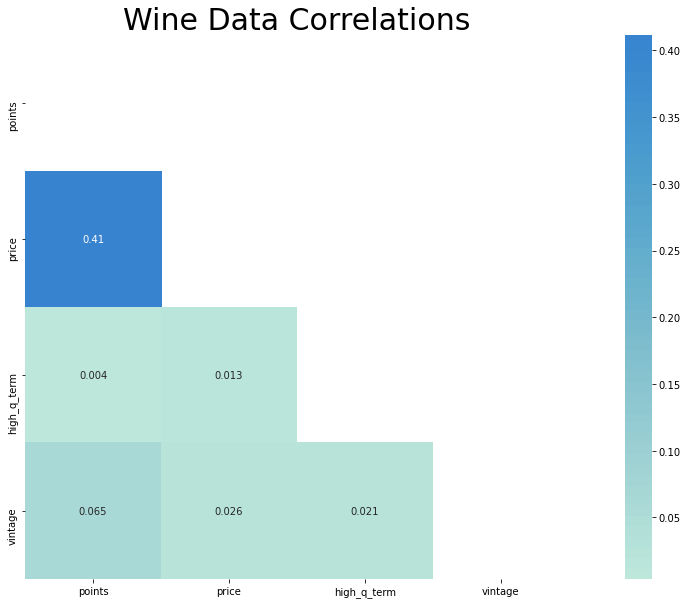

In [50]:
# Establish size of figure.
plt.figure(figsize=(20,10))
# add title
plt.title('Wine Data Correlations',fontsize=30)

# code to make heatmap a triangle (instead of square)
# found at python-graph-gallery.com/
matrix = np.triu(df.corr())

# sns code
sns.heatmap(df.corr(),
            center=True, #changes color - found by trial/error 
            annot=True, #annotate
            fmt ='.2g',
            square=True,
            mask=matrix
           );

**>>>Interpretation<<<**

- The only significant correlation in our numeric data is between Price and Review Score.


[Table of Contents](#Table-Of-Contents)
### Data Distributions

We established two functions to build horizontal and vertical distribution visualizations.

In [51]:
# Function to make horizontal distribution graphs
def data_distribution(df, column, title, xlabel,ylabel, values):
    
    fig = plt.figure(figsize=(6,6))
    ax = plt.gca()

    df[column].value_counts().head(values).plot(kind = 'barh',color='purple')

    ax.set_title(title, fontsize=26, pad=15)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

    fig.tight_layout();

In [52]:
# Function to make vertical distribution graphs
def data_distribution_vert(df, column, title, xlabel,ylabel, values):

    fig = plt.figure(figsize=(8,6))
    ax = plt.gca()

    df[column].value_counts().sort_index().plot(kind = 'bar',color='purple')

    ax.set_title(title, fontsize=26, pad=15)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

    fig.tight_layout();


#### Wine Price Distribution

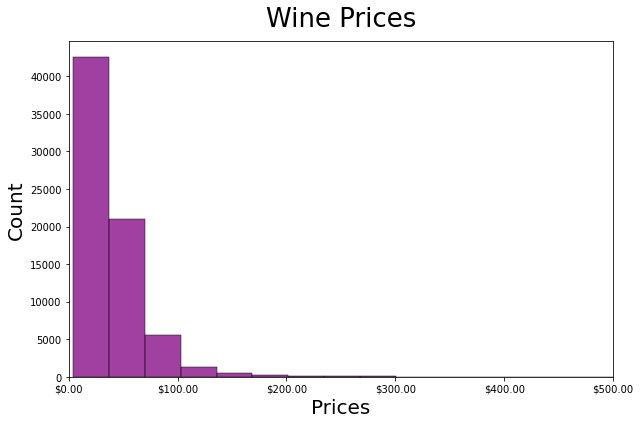

In [53]:
# special case graph again to deal with the currency values for the xticks

fig = plt.figure(figsize=(9,6))
ax = plt.gca()

sns.histplot(df['price'],bins=100, kde = False,color='purple')

# Format xticks to be in $ format
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)

plt.xlim([0, 500])

ax.set_title('Wine Prices', fontsize=26, pad=15)
ax.set_xlabel('Prices', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

fig.tight_layout();

**>>>Interpretation<<<**

- About pricing data is certainly skewed right, so we tried logging it.

#### Logged Wine Price Distribution

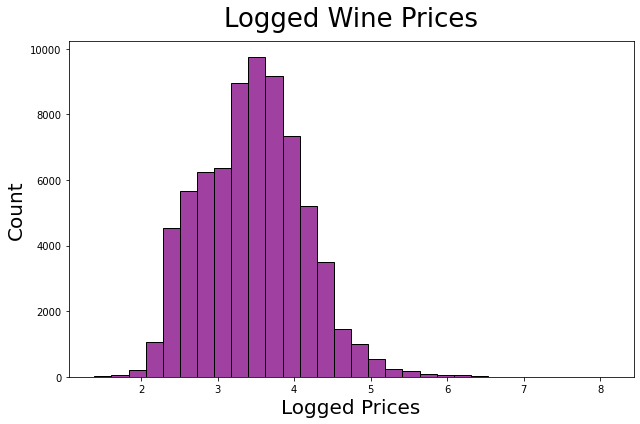

In [54]:
# special case graph again, this time to with the logged price
fig = plt.figure(figsize=(9,6))
ax = plt.gca()

sns.histplot(np.log(df['price']),bins=30, kde = False,color='purple')

ax.set_title('Logged Wine Prices', fontsize=26, pad = 15)
ax.set_xlabel('Logged Prices', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

fig.tight_layout();

**>>>Interpretation<<<**

- The logged price distribution is fairly normal so we will use this as our regression target variable.

#### Wines By Country  Distribution

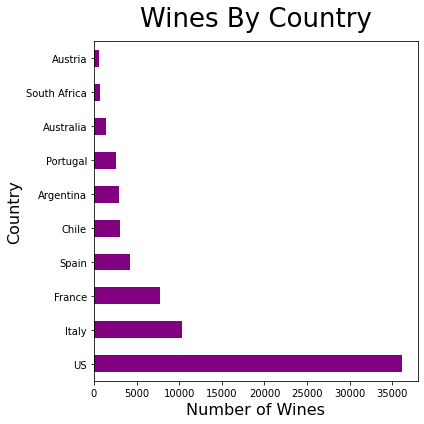

In [55]:
data_distribution(df,'country','Wines By Country', 'Number of Wines','Country',10)

**>>>Interpretation<<<**

- A vast percentage of the wines are from the US (just over half).
- Italy and France have over 7,500 wines each.
- Spain, Clile, Argentina and Portugal have over 2,500 wines each.

#### Wines By Vintage Distribution

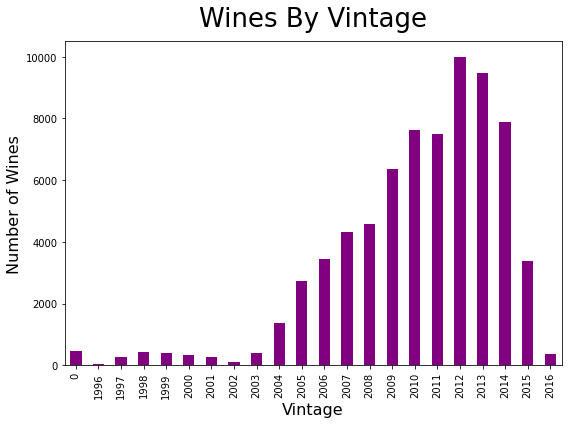

In [56]:
data_distribution_vert(df,'vintage','Wines By Vintage', 'Vintage','Number of Wines', 50)

**>>>Interpretation<<<**

- While, there is a small number of reviews for other years, the vast quantity of reviews in our dataset were done for wines with vintages between 2004 and 2015.
- Distribution is left skewed.
- The 0 vintage wines is for wines with no vintage listing.


#### Wines By Variety  Distribution

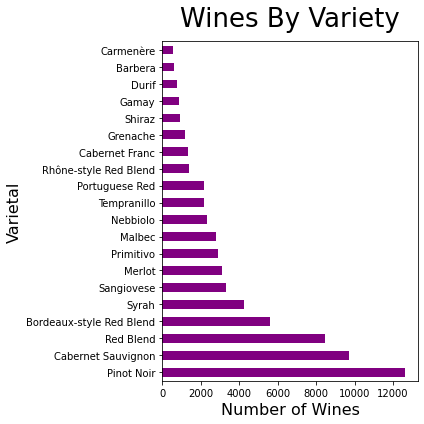

In [57]:
data_distribution(df,'variety','Wines By Variety', 'Number of Wines','Varietal', 20)

**>>>Interpretation<<<**

- Not surprisingly, the two most common varieties are wines that are grown in the US.
- There are 15 varieties with over 1,000 reviews which we can look at in further detail later.


#### Wines By Region Distribution

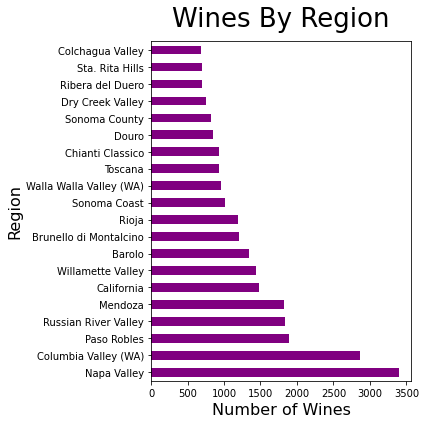

In [58]:
data_distribution(df,'region','Wines By Region', 'Number of Wines','Region', 20)

**>>>Interpretation<<<**

- Not surprisingly, most of the top regions are in the US.
- There are 11 regions with over 1,000 reviews which we can look at in further detail later.


#### Wine Score Distribution

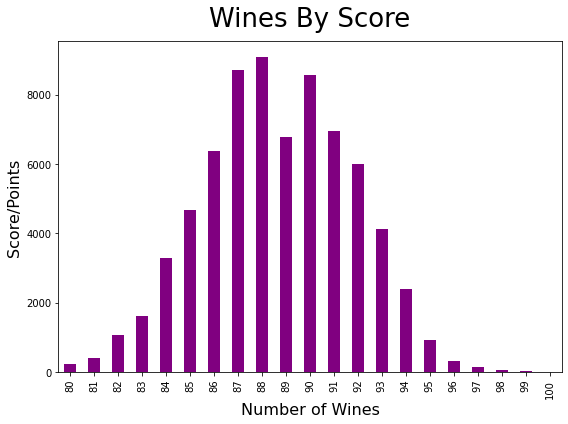

In [59]:
data_distribution_vert(df,'points','Wines By Score', 'Number of Wines','Score/Points', 20)


In [60]:
df.describe()

,points,price,high_q_term,vintage
count,71732.000000,71732.000000,71732.000000,71732.000000
mean,88.661727,40.143827,0.169534,1997.551330
std,3.094855,44.124935,0.375225,159.459368
min,80.000000,4.000000,0.000000,0.000000
25%,87.000000,20.000000,0.000000,2008.000000
50%,89.000000,30.000000,0.000000,2011.000000
75%,91.000000,50.000000,0.000000,2013.000000
max,100.000000,3300.000000,1.000000,2016.000000


**>>>Interpretation<<<**

- The wine scores are in a fairly normal distribition with a mean of 88.66 and a mode of 89.
- The lower occurrence of the 89 value could be interpreted lots of ways.
    * Perhaps the reviewers are hesitant ot get someone close to 90 and not reach that honor.


#### Special Designation Wines Distribution

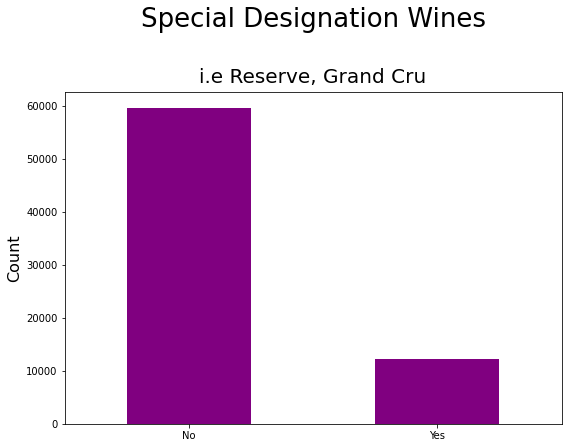

In [61]:
  # special graph need for this one to deal with changing 0 & 1 to No & Yes
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

df['high_q_term'].value_counts().sort_index().plot(kind = 'bar',color='purple')

plt.xticks(np.arange(0, 1))
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0)

## Notice the addition of the suptitle to allow for the explanation of what this is.
ax.set_title('i.e Reserve, Grand Cru',fontsize=20,pad=10)
plt.suptitle('Special Designation Wines', y=1.03, x=.55,fontsize=26)
ax.set_ylabel('Count', fontsize=16)

fig.tight_layout();

**>>>Interpretation<<<**

- About 1/7 of our wines are a Reserve wine or similar desigmation.
- It seems that we may be overpaying for these wines. While their average score is only 0.03% higher, average price is 3.94% higher.
    + Average Score
        * Reserve:     88.69
        * Non-Reserve: 88.66    
    + Average Price
        * Reserve:     \$41.45
        * Non-Reserve: \$39.88


[Table of Contents](#Table-Of-Contents)
### Data Iterations with Logged Price

#### Relationship between Wine Price & Review Score

Given the high correlation between price and score, we wanted to look at scatterplots of this relationship for both price and logged price. For visual reference, we also created points to graph the mean prices over the scatter.

In [62]:
# For each "points" value, determining mean "price" and mean logged "price"
y2 = range(80,101)
x2 = []
x3 = []

for y_value in y2:
    point = df['points'] == y_value
    x2.append(df.groupby(point)['price'].mean()[1])
    x3.append(np.log((df.groupby(point)['price'].mean()[1])))

#### Price vs. Score Scatterplot

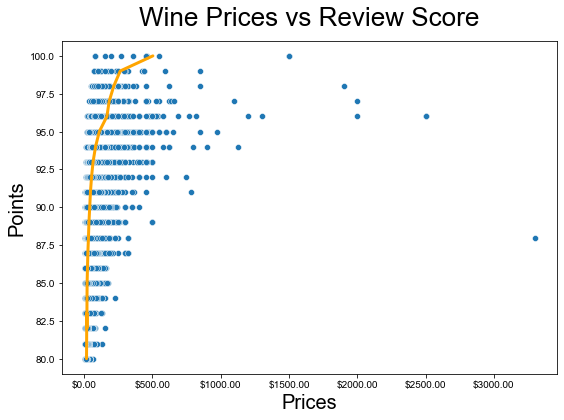

In [63]:
# Scatterplot of Price vs Score/Points
# establish figure and axes objects
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

# plotting prices x score
sns.scatterplot(x=df['price'], y=df['points'])
sns.set(rc={"lines.linewidth": 3})
# adding line for avg. price x score
sns.lineplot(x=x2, y=y2,color='orange')

# Format xticks to be in $ format
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)

## Notice the change to the method names ##
ax.set_title('Wine Prices vs Review Score', fontsize=26, pad=15)
ax.set_xlabel('Prices', fontsize=20)
ax.set_ylabel('Points', fontsize=20)

fig.tight_layout();

#### Logged Price vs. Score Scatterplot

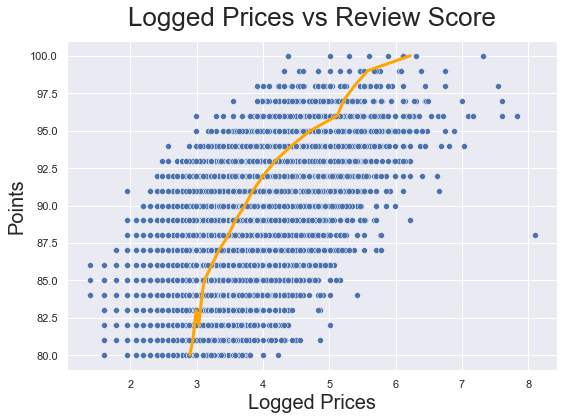

In [64]:
# We do the same graph looking at the logged price
# establish figure and axes objects
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

# supply ax to the pandas plotting method
sns.scatterplot(x=np.log(df['price']), y=df['points'])
sns.set(rc={"lines.linewidth": 3})
sns.lineplot(x=x3, y=y2,color='orange')

## Notice the change to the method names ##
ax.set_title('Logged Prices vs Review Score', fontsize=26, pad=15)
ax.set_xlabel('Logged Prices', fontsize=20)
ax.set_ylabel('Points', fontsize=20)

fig.tight_layout();

**>>>Interpretation<<<**

- In each of these graphs, we see a pretty tight relationship between price and review score. 
    * Note that the average price goes sharply higher as scores approach 100. As we saw above, scores over 95 are extremely rare and prices for these wines seem to be abnormally high to take advanatage.
- The second graph supports our use of the logged price for our model as we see our average price lying right in the center of the range of prices.
    * Even here, we still see a premium being charged for the high-rated wines.

#### Correlation Matrix Revisitied With Log Price

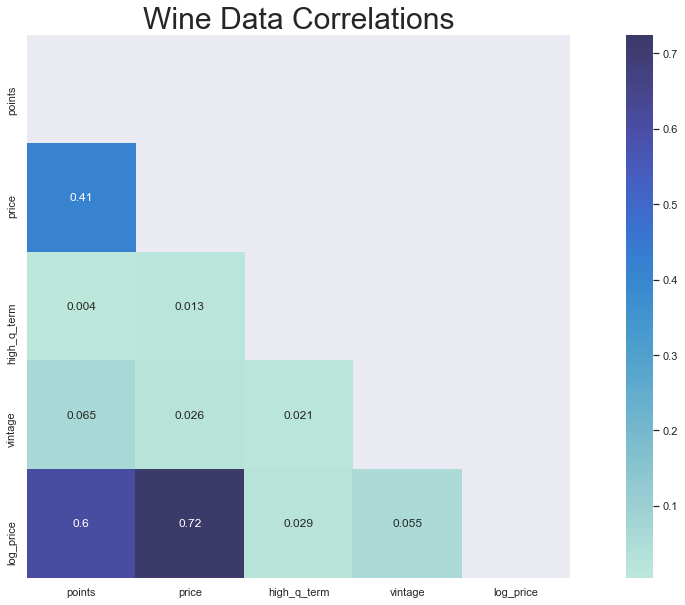

In [65]:
# Now, we revisit correlation, this time adding log-price
df_log = df
df_log['log_price'] = np.log(df['price'])

# Establish size of figure.
plt.figure(figsize=(20,10))
# add title
plt.title('Wine Data Correlations',fontsize=30)

# code to make heatmap a triangle (instead of square)
# found at python-graph-gallery.com/
matrix = np.triu(df.corr())

# sns code
sns.heatmap(df_log.corr(),
            center=True, #changes color - found by trial/error 
            annot=True, #annotate
            fmt ='.2g',
            square=True,
            mask=matrix
           );

**>>>Interpretation<<<**

- We've added the log-price to our correlations matrix and we see that the price/points correlation goes from 41% to 60% when we log the price. 
    * This is certainly a good start towards explaining the variance.

[Table of Contents](#Table-Of-Contents)
### Cost-Per-Point Analysis

In an attempt to normalize our data and compare apples to apples (or at least Granny Smiths to McIntoshes), we did the following: 
- Engineered a column called 'value_per_point' by dividing price by points. 

#### By Variety
First, we used our new column to analyze Varieties
- We built a new dataframe with columns of wine variety, count and average cost-per-point.
- We created a visualization to compare average cost-per-point of different varieties.

In [66]:
# creating new column  to give us price per point awarded in the review
df['value_per_point'] = df['price']/df['points']

In [67]:
# building matching lists of varieties, value counts and average value-per-point 
varieties = df['variety'].value_counts().sort_index().keys().tolist()
number_of_wines = df['variety'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('variety')['value_per_point'].mean().sort_index().tolist()

In [68]:
# Building a new dataframe with these figures
df_vintage_stats = pd.DataFrame()
df_vintage_stats['variety'] = varieties
df_vintage_stats['count'] = number_of_wines
df_vintage_stats['cost_per_point'] = avg_value_per_point

In [69]:
# Using a mask to create a list with only vintages that have more than 1000 wines in the data
over_1000 = df_vintage_stats['count'] >= 1000
df_vintage_stats = df_vintage_stats.loc[over_1000]

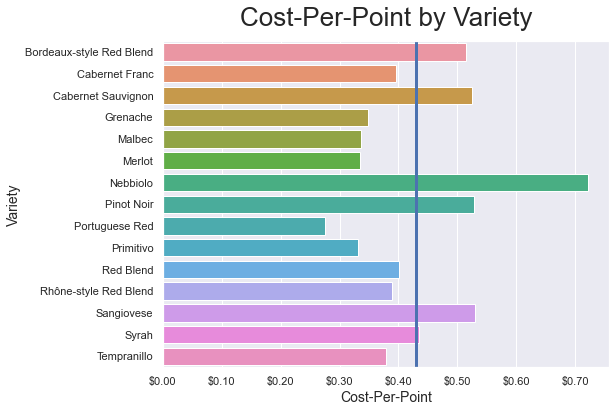

In [70]:
# Graphing cost-per-point by Variety
def dollars(x, pos):
    'The two args are the value and tick position'
    return '$%1.11' % (x * 1e-6)

plt.figure(figsize=(8,6))
plt.title('Cost-Per-Point by Variety',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='variety',data=df_vintage_stats, orient='h')

ax1.xaxis.set_major_formatter('${x:1.2f}')
ax1.set_xlabel('Cost-Per-Point', fontsize=14)
ax1.set_ylabel('Variety', fontsize=14)

# Adding line for overall mean cost-per-point 
ax2 = plt.axvline(.43, 0,1);



**>>>Interpretation<<<**

- The mean cost_per_point is represented by the blue line so we can see which of the top 15 vintages have a higher cost per point and which have a lower one.
    - This analysis hinges on the idea that a rating for one type of wine can be equated with the same score for another.
    - The consensus on our team is that we like Rhone wine so it's nice to see it under the mean. We are going to do some sampling of Primitivo, Malbec and some Portuguese reds.
    - The data can also be shared for other vintages which did not have over 1,000 wines in the data.
    
#### By Region
We repeated the process above but comparing cost-per-point by region.

In [71]:
regions = df['region'].value_counts().sort_index().keys().tolist()
number_of_wines = df['region'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('region')['value_per_point'].mean().sort_index().tolist()

In [72]:
df_region_stats = pd.DataFrame()
df_region_stats['region'] = regions
df_region_stats['count'] = number_of_wines
df_region_stats['cost_per_point'] = avg_value_per_point

In [73]:
over_1000 = df_region_stats['count'] >= 1000
df_region_stats = df_region_stats.loc[over_1000]

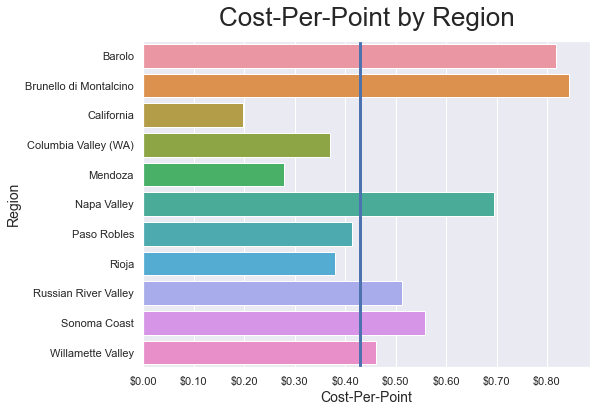

In [74]:
plt.figure(figsize=(8,6))
plt.title('Cost-Per-Point by Region',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='region',data=df_region_stats, orient='h')

ax1.xaxis.set_major_formatter('${x:1.2f}')
ax1.set_xlabel('Cost-Per-Point', fontsize=14)
ax1.set_ylabel('Region', fontsize=14)

ax2 = plt.axvline(.43, 0,1);

**>>>Interpretation<<<**

- Rioja (from Spain), Columbia Valle (from Washington State), Paso Robles (from California) and Mendoza (from Argetntina) are all regions that had low costs per point.
- The California region is probably at a low cost for a reason. Clearly, we aren't talking about wines from Napa or Sanoma.
- Again, it should be noted that we have data for several more regions, some with 100s of wine in the data.

#### By Vintage
We repeated the process above but comparing cost-per-point by vintage.

In [75]:
vintage = df['vintage'].value_counts().sort_index().keys().tolist()
number_of_wines = df['vintage'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('vintage')['value_per_point'].mean().sort_index().tolist()

In [76]:
df_vintage_stats = pd.DataFrame()
df_vintage_stats['vintage'] = vintage
df_vintage_stats['count'] = number_of_wines
df_vintage_stats['cost_per_point'] = avg_value_per_point

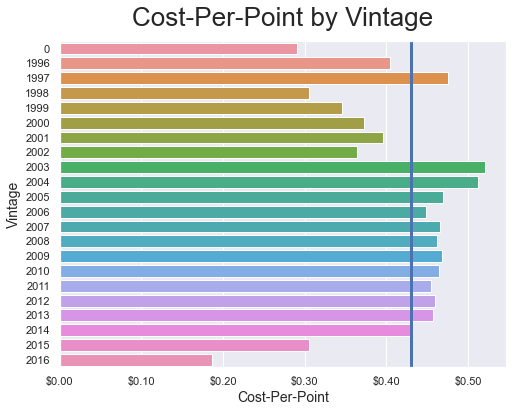

In [77]:
plt.figure(figsize=(8,6))
plt.title('Cost-Per-Point by Vintage',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='vintage',data=df_vintage_stats, orient='h')

ax1.xaxis.set_major_formatter('${x:1.2f}')
ax1.set_xlabel('Cost-Per-Point', fontsize=14)
ax1.set_ylabel('Vintage', fontsize=14)

ax2 = plt.axvline(.43, 0,1);

**>>>Interpretation<<<**

- It is hard to truly interpret the cost per point by vintage. So much is tied up with the vintage and, since we are dealing with wines from all over the world, a bad year in one place should cancel out a good year someplace else.
- Two things that we can say from this visual:
    * Young wines from 2015 and 2016 (the data is from 2017) are probaly at a lower cost per point because many of them are too early to drink so they are being sold at lower prices.
    * Wines that have no vintage in the title are great values based on this data. These are mostly table wines so it may be a time to have a table wine tasting.
    
#### By Designation
We repeated the process above but comparing cost-per-point by designation (high quality term vs none).

In [78]:
designation = df['high_q_term'].value_counts().sort_index().keys().tolist()
number_of_wines = df['high_q_term'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('high_q_term')['value_per_point'].mean().sort_index().tolist()

In [79]:
df_vintage_stats = pd.DataFrame()
df_vintage_stats['high_q_term'] = designation
df_vintage_stats['count'] = number_of_wines
df_vintage_stats['cost_per_point'] = avg_value_per_point

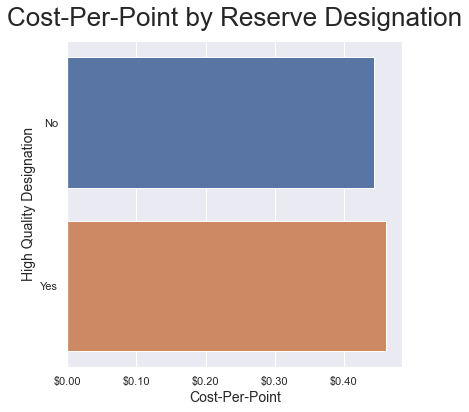

In [80]:
plt.figure(figsize=(6,6))
plt.title('Cost-Per-Point by Reserve Designation',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='high_q_term',data=df_vintage_stats, orient='h')

ax1.xaxis.set_major_formatter('${x:1.2f}')
plt.yticks(np.arange(0, 1))
plt.yticks(np.arange(2), ['No', 'Yes'], rotation=0)

ax1.set_xlabel('Cost-Per-Point', fontsize=14)
ax1.set_ylabel('High Quality Designation', fontsize=14);

**>>>Interpretation<<<**

- This graph is surprising - given the pricing and review data we looked at above, we would would have expected a larger gap here.
- It suggests that it is better to avoid the fancy reserve wines.

[Table of Contents](#Table-Of-Contents)
### Word Frequency Analysis of Review Text

To gain a better understanding of language that is associated with wine and the frequency of different words for low-priced vs. high-priced wine, we did a natural language processing analysis of the review copy.

- We built a function to apply a vectorizer to a set of data.
- The we created two sub-dataframes:
    * One for wines that cost less than \\$40.
    * One for wines that cost greater than or equal to \\$40.
- Next, we ran main dataframe and the two sub-dataframes through the function.

In [81]:
# Creating function to instantiate and fit CountVectorizer
def count_vec(df,column,plt_title):
    cvec = CountVectorizer(lowercase=True, 
                       ngram_range = (1,1),
                       stop_words=(stopwords.words('english'))
                       ) 

    X_text = cvec.fit_transform(df[column])
    X_text_df = pd.DataFrame(X_text.toarray(), 
                         columns=cvec.get_feature_names())
    word_list = X_text_df.columns.tolist()
    sum_list = [X_text_df[column].sum() for column in X_text_df.columns]
    
    # building dataframe of words and counts
    word_sums = pd.DataFrame()
    word_sums['Word'] = word_list
    word_sums['Count']  = sum_list
    word_sums_30 = word_sums.sort_values('Count', ascending=False).head(30)

    fig = plt.figure(figsize=(8,7))
    ax = plt.gca()

    sns.barplot(data=word_sums_30, y="Word", x='Count',palette="autumn",ax=ax)

    ax.set_title(plt_title, fontsize=26, pad=20)
    ax.set_xlabel('Count', fontsize=14)
    ax.set_ylabel('Word', fontsize=14)

    fig.tight_layout()

In [82]:
# Creating separate DataFrame for wines under $40
df_under = df[df['price'] < 40]

In [83]:
# Creating separate DataFrame for wines $40 and over
df_over = df[df['price'] >= 40]

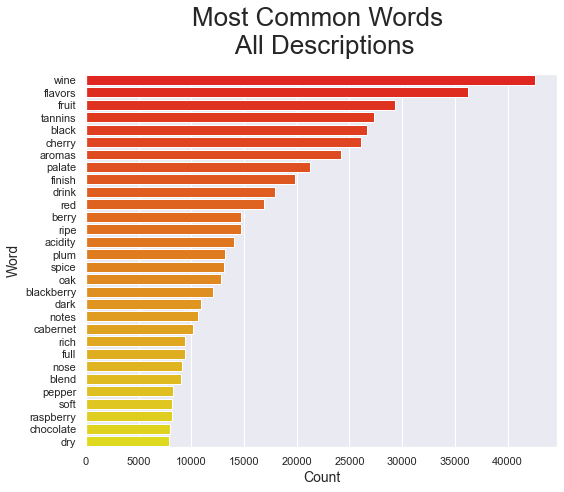

In [84]:
# calling vectorizer function for the description column, in this case looking at all rows
all_words = count_vec(df,'description','Most Common Words \n All Descriptions')

**>>>Interpretation<<<**

- These are the 30 most common words used in the review descriptions for all of our wines.
    - Given that all of our wines are reds, it is not surprising to see terms like tannins, black, cherry, oak (for the barrels), dark, and cabernet in the list 

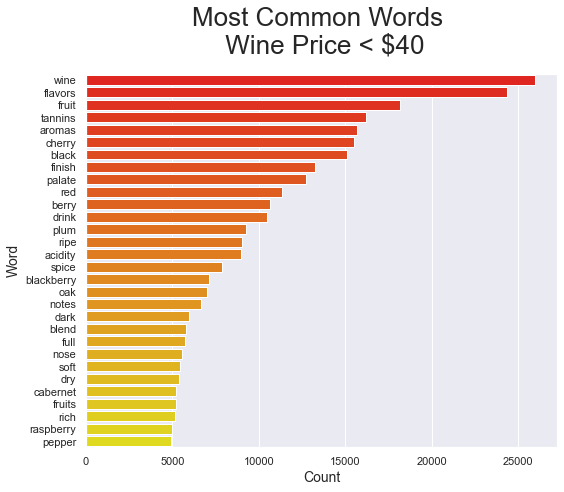

In [85]:
# calling vectorizer function for the description column, in this case for the wines under $40
df_under_words = count_vec(df_under,'description','Most Common Words \n Wine Price < $40')

**>>>See interpretation below<<<**

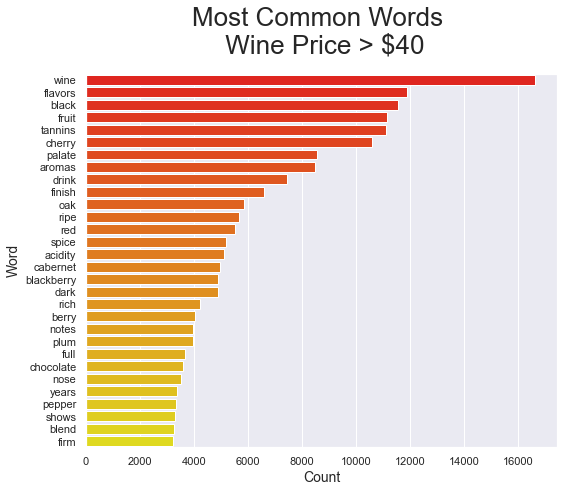

In [86]:
# calling vectorizer function for the description column, in this case for the wines $40 and over
df_over_words = count_vec(df_over,'description', 'Most Common Words \n Wine Price > $40')

**>>>See interpretation below<<<**

#### Combined Data

Our final step was to create a top 30 ranking dataframe for each set of data, which we merged so that we could compare and contrast the lists.

In [87]:
# function to build dataframes with the top 30 words ranked 1 to 30 
def vector_func(df,column_name,rank_name):
    cvec = CountVectorizer(lowercase=True, ngram_range = (1,1), stop_words=(stopwords.words('english'))) 
    X_text = cvec.fit_transform(df[column_name])
    X_text_df = pd.DataFrame(X_text.toarray(), columns=cvec.get_feature_names())
    word_list_func = X_text_df.columns.tolist()
    sum_list_func = [X_text_df[column].sum() for column in X_text_df.columns]
    word_sums = pd.DataFrame()
    word_sums['word'] = word_list_func
    word_sums['sum']  = sum_list_func
    word_sums_30 = word_sums.sort_values('sum', ascending=False).head(30)
    word_sums_30[rank_name] = [n for n in range(1,31)]
    word_sums_30.drop(columns='sum',inplace=True)
    return word_sums_30

In [88]:
# Calling function for each NLP grouping
df_rank_nlp = vector_func(df, 'description', 'All')
df_rank_nlp_over  = vector_func(df_over, 'description','Price_Over_40')
df_rank_nlp_under  = vector_func(df_under, 'description','Price_Under_40')
df_rank_nlp['All'] = df_rank_nlp['All'].astype('Int64')
df_rank_nlp_over['Price_Over_40'] = df_rank_nlp_over['Price_Over_40'].astype('Int64')
df_rank_nlp_under['Price_Under_40'] = df_rank_nlp_under['Price_Under_40'].astype('Int64')

In [89]:
# Merging dataframes together and displaying
merge_1 = pd.merge(df_rank_nlp,df_rank_nlp_over,how='outer',on='word')
merge_final = pd.merge(merge_1,df_rank_nlp_under,how='outer',on='word')

merge_final

,word,All,Price_Over_40,Price_Under_40
0,wine,1,1,1
1,flavors,2,2,2
2,fruit,3,4,3
3,tannins,4,5,4
4,black,5,3,7
5,cherry,6,6,6
6,aromas,7,8,5
7,palate,8,7,9
8,finish,9,10,8
9,drink,10,9,12


In [90]:
# Creating lists to highlight rows where the rank for one price range is at least 4 rankings 
# higher than the other price range (this includes cases where one price range is not in the
# top 30)
over_list = []
under_list = []

for index, rank in enumerate(merge_final['Price_Over_40']):
    if pd.isnull(merge_final.loc[index, 'Price_Over_40']) == True:
        if pd.isnull(merge_final.loc[index, 'Price_Under_40']) == False:
            under_list.append(index)
    else:
        if pd.isnull(merge_final.loc[index, 'Price_Under_40']) == True:
            over_list.append(index)
        else:
            if merge_final['Price_Under_40'][index] - merge_final['Price_Over_40'][index] > 3:
                over_list.append(index)
            elif merge_final['Price_Over_40'][index] - merge_final['Price_Under_40'][index] > 3:
                under_list.append(index)

over_list_ranks = [np.str(merge_final['Price_Over_40'][n]) for n in over_list]
under_list_ranks = [np.str(merge_final['Price_Under_40'][n]) for n in under_list]


In [91]:
# using the lists to create reduced dataframes
merge_final_over = merge_final.loc[over_list,:]
merge_final_under = merge_final.loc[under_list,:]

In [92]:
merge_final_over

,word,All,Price_Over_40,Price_Under_40
4,black,5,3,7
16,oak,17,11,18
20,cabernet,21,16,26
21,rich,22,19,28
28,chocolate,29,24,<NA>
30,years,<NA>,26,<NA>
31,shows,<NA>,28,<NA>
32,firm,<NA>,30,<NA>


In [93]:
merge_final_under

,word,All,Price_Over_40,Price_Under_40
11,berry,12,20,11
14,plum,15,22,13
24,blend,25,29,21
26,soft,27,<NA>,24
27,raspberry,28,<NA>,29
29,dry,30,<NA>,25
33,fruits,<NA>,<NA>,27


In [94]:
column_list = merge_final_over.columns.tolist()
column_list

['word', 'All', 'Price_Over_40', 'Price_Under_40']

In [95]:
def replace_nulls(df,column_list):
#     Change datatype to string to allow for changes
    df[[column_list[1],column_list[2],column_list[3]]] = df[[column_list[1],column_list[2],column_list[3]]].astype(str)
    
#     reset index of dataframe
    reset_index(df)

# Fill null cells with 'Over 30'
    for column in column_list:
        for number in range(0,len(df)):
            if df[column][number] == '<NA>':
                df[column][number] = 'Over 30'

    return df


In [96]:
merge_final_over = replace_nulls(merge_final_over,column_list)
merge_final_under = replace_nulls(merge_final_under,column_list)

In [97]:
# Setting up highlighting by row
def highlight(s):
    if s.Price_Over_40 in over_list_ranks:
        return ['background-color: yellow']*4
    elif s.Price_Under_40 in under_list_ranks:
        return ['background-color: lightgreen']*4
    else:
        return ['background-color: white']*4

In [98]:
# Creating DataFrame of key words that are more used for wines 
# that are over $40 

merge_final_over.style.apply(highlight, axis=1).hide_index()


word,All,Price_Over_40,Price_Under_40
black,5,3,7
oak,17,11,18
cabernet,21,16,26
rich,22,19,28
chocolate,29,24,Over 30
years,Over 30,26,Over 30
shows,Over 30,28,Over 30
firm,Over 30,30,Over 30


**>>>Interpretation<<<**

- This chart of shows us the words where the ranking for the wines over \\$40 was at least four above the ranking for the wines that are under $40.
    - Oak makes sense since aging in this wood is seen as premium.
    - 'cabernet' in this list but neither 'pinot' nor 'noir', which is certainly interesting given that there are nearly 3,000 more pinot noirs in the dataset.
    - Years also makes sense because longer aging typically is associated with higher price.
    - The other terms here are black, rich, chocolate, shows and firm. 
    

In [99]:
# Creating DataFrame of key words that are more used for wines that are under $40 
merge_final_under.style.apply(highlight, axis=1).hide_index()

word,All,Price_Over_40,Price_Under_40
berry,12,20,11
plum,15,22,13
blend,25,29,21
soft,27,Over 30,24
raspberry,28,Over 30,29
dry,30,Over 30,25
fruits,Over 30,Over 30,27


**>>>Interpretation<<<**

- This chart of shows us the words where the ranking for the wines under \\$40 was at least four above the ranking for the wines that are over $40.
    - Terms like berry, plum, soft, raspberry and fruits can all be associated with lighter, sweeter wines - we will follow this theory up by paying attention to sweeter varietals and how they affect price.
    - Blends are typically less expensive so it makse sense to see that here.
    - We would have expected to see the word dry in the other list but perhaps it is just exoected with more expensive wine and mentioned more often in reviews for less expensive wines.


In [100]:
df.shape

(71732, 10)

[Table of Contents](#Table-Of-Contents)
### Data Cleanup / Saving / Dummy Conversion

At this point, we did the following actions:
1. Eliminated columns that were created for EDA purposes which were not being used in the modeling.
1. Saved data for use in unsupervised learning.
1. Converted several columns from the original data to dummy columns as they need to be numeric values for the modeling process. 
1. Saved converted data for modeling.

#### Vintage Column
- Converted vintage into values of years old.
    * All wines are aged vs. 2017 so a 2015 wine value would be 2.
    * Wines with no vintage information are given the age of 0 which is appropriate because table wines are typically made for immediate drinking.
    * This is done before the data save for unsupervised learning since this data can be used in that process.

In [101]:
df['vintage'] = [0 if year == 0 else (2017 - year) for year in df['vintage']]

#### Log-Price, Value-Per-Point & Description Columns
- Dropped columns.

In [102]:
df.drop(columns=['log_price', 'value_per_point','description'], inplace=True)

#### Save DataFrame for Unsupervised Learning
- This model cannot use dummy column data so we are saving prior to dummying columns.

In [103]:
# Saving dataframe for use in KPrototypes (which does the dummy work itself)
df.to_csv('../data/clean_eda_data_kmodes.csv',index=False)

#### Country, Variety & Region Columns
Created dummies for these three columns using the following process:
1. Created the dummy columns.
1. Built lists of the low-occuring region, variety and country columns that were created in step 1 and combined those into one list.
1. Dropped these columns.

In [104]:
df = pd.get_dummies(df, columns=['country','variety','region'], drop_first= False)

In [105]:
region_delete_list = ["region_Valtellina Superiore","region_Rheinhessen","region_Fort Ross-Seaview","region_Salice Salentino","region_Nebbiolo d'Alba","region_Terra Alta","region_Valle de Guadalupe","region_Montecucco","region_Valdepeñas","region_Columbia Gorge (OR)","region_Marin County","region_Barbera d'Alba Superiore","region_Fronton","region_Campania","region_Côtes du Rhône Villages","region_Pays d'Oc","region_Grand Valley","region_Mendoza Province","region_Gattinara","region_Juliénas","region_Clos de Vougeot","region_New Mexico","region_Peumo","region_Cortona","region_Chiroubles","region_Bergerac","region_Isola dei Nuraghi","region_Swartland","region_Templeton Gap District","region_Crozes-Hermitage","region_Robertson","region_Minervois","region_Fronsac","region_Primitivo di Manduria","region_Canelones","region_Dominio de Valdepusa","region_Texas","region_Colli della Toscana Centrale","region_Listrac-Médoc","region_Fiddletown","region_Kakheti","region_Corton","region_Bandol","region_Sagrantino di Montefalco","region_Sant'Antimo","region_Neuquén","region_Fair Play","region_Chianti Colli Senesi","region_Montagne-Saint-Émilion","region_Calchaquí Valley","region_Saint-Amour","region_Cornas","region_Cannonau di Sardegna","region_Gigondas","region_Coteaux d'Aix-en-Provence","region_Elqui Valley","region_Heathcote","region_Redwood Valley","region_Catalunya","region_Castel del Monte","region_Moulis-en-Médoc","region_Seneca Lake","region_Santenay","region_Saint-Joseph","region_San Benito County","region_Bío Bío Valley","region_Echézeaux","region_Veneto","region_Côte Rôtie","region_Penedès","region_Western Australia","region_Langhorne Creek","region_Moldova","region_Côte de Brouilly","region_Roero","region_Argentina","region_Chile","region_San Antonio","region_Yolo County","region_Simonsberg-Stellenbosch","region_High Valley","region_Hermitage","region_Salta","region_Lake Chelan","region_Côtes de Gascogne","region_Aloxe-Corton","region_Suisun Valley","region_Cigales","region_Puisseguin Saint-Émilion","region_Piave","region_Adelaide Hills","region_Clarendon","region_Hudson River Region","region_Lussac Saint-Émilion","region_Victoria","region_Côtes de Bergerac","region_Spain","region_Leithaberg","region_Pfalz","region_Perdriel","region_Paicines","region_Long Island","region_Marchigue","region_Coteaux du Languedoc","region_Côtes du Marmandais","region_Upper Galilee","region_Ribeira Sacra","region_Solano County","region_Almansa","region_Lontué Valley","region_Chorey-lès-Beaune","region_Old Mission Peninsula","region_Naoussa","region_Peloponnese","region_Clear Lake","region_Estremadura","region_Vigneti delle Dolomiti","region_Chianti Colli Fiorentini","region_Beira Interior","region_Temecula","region_Vacqueyras","region_Mittelburgenland","region_Côtes du Roussillon Villages","region_Padthaway","region_Terre del Volturno","region_Corbières","region_Carmignano","region_Coteaux Bourguignons","region_Givry","region_Cerasuolo di Vittoria","region_Veronese","region_Francs Côtes de Bordeaux","region_Valpolicella Superiore Ripasso","region_Rosso del Veronese","region_Colorado","region_Cienega Valley","region_Ghemme","region_Saint-Nicolas-de-Bourgueil","region_Yecla","region_Moon Mountain District Sonoma County","region_Uruguay","region_Chianti Superiore","region_Lirac","region_Río Negro Valley","region_Maipú","region_Ventoux","region_Vittoria","region_Sforzato di Valtellina","region_Saumur-Champigny","region_Villány","region_Naches Heights","region_Mornington Peninsula","region_Faugères","region_Buzet","region_Costers del Segre","region_Régnié","region_Mokelumne River","region_Rosso Conero","region_Montepulciano d'Abruzzo Colline Teramane","region_Bourgueil","region_Shenandoah Valley","region_Missouri","region_Cochise County","region_Palmela","region_Côte de Nuits-Villages","region_Loncomilla Valley","region_Eisenberg","region_Saint-Chinian","region_Puente Alto","region_Sangiovese di Romagna Superiore","region_Dealu Mare","region_Cerasuolo di Vittoria Classico","region_Rosso Piceno","region_Southwest France","region_Wellington","region_Middleburg","region_El Dorado County","region_Hunter Valley","region_Württemberg","region_Aegean","region_Napa County-Sonoma County","region_Bourgogne Hautes Côtes de Nuits","region_Tasmania","region_Sonoma County-Napa County","region_Val di Cornia Suvereto","region_Chénas","region_Morey-Saint-Denis","region_Charmes-Chambertin","region_Menetou-Salon","region_Clements Hills","region_Marche","region_Alto Valle del Río Negro","region_Empordà","region_Columbia Gorge (WA)","region_Bordeaux Clairet","region_Marsannay","region_Elkton Oregon","region_Chambertin","region_Dunnigan Hills","region_Côtes du Roussillon","region_Vienna","region_Anjou","region_Bekaa Valley","region_Côtes du Tarn","region_Colline Novaresi","region_Duriense","region_Turkey","region_Conero","region_Juanico","region_Ica","region_Valpolicella Ripasso","region_Ankara","region_Monferrato","region_Valdeorras","region_Israel","region_Chiles Valley","region_Coste della Sesia","region_Bendigo","region_Lolol Valley","region_Lake Michigan Shore","region_Vista Flores","region_Drama","region_Pennsylvania","region_Great Southern","region_Carneros-Napa Valley","region_Zenata","region_Napa-Sonoma","region_Hautes Côtes de Nuits","region_Ribatejano","region_Pernand-Vergelesses","region_Progreso","region_Bardolino","region_Viile Timisului","region_San Francisco Bay","region_Setubal","region_Samson","region_Minervois La Liviniere","region_Ben Lomond Mountain","region_Manchuela","region_Potter Valley","region_Valpolicella Classico Superiore","region_Fixin","region_Aconcagua Costa","region_Eger","region_Corse","region_Elgin","region_Beiras","region_Serra Gaúcha","region_Nelson","region_Orcia","region_Delle Venezie","region_Aglianico del Taburno","region_Limestone Coast","region_Pyrenees","region_Galil","region_Apalta","region_Ruché di Castagnole Monferrato","region_Premieres Côtes de Bordeaux","region_Texas High Plains","region_Bramaterra","region_Cayuga Lake","region_Montravel","region_Vino Spumante","region_Molise","region_Barbera d'Asti Superiore Nizza","region_Crémant de Bourgogne","region_Ribatejo","region_Valpolicella Superiore","region_Vinos de Madrid","region_Uclés","region_Humboldt County","region_Rheingau","region_Wagram","region_Cucamonga Valley","region_Clos de la Roche","region_Swan Creek","region_Les Baux de Provence","region_Northern Sonoma","region_Sonoma-Napa","region_Colchagua Costa","region_Rosso Piceno Superiore","region_Canon-Fronsac","region_Shomron","region_Lazio","region_Famatina Valley","region_Chambertin Clos de Bèze","region_Portuguese Table Wine","region_Vin de Liqueur","region_Australia","region_Cauquenes Valley","region_Goriska Brda","region_Romania","region_Côte Chalonnaise","region_Touraine","region_Danube River Plains","region_Saint-Mont","region_San Luis Obispo","region_Trentino","region_North Dalmatia","region_Extremadura","region_Awatere Valley","region_Lessona","region_Valpolicella","region_Franschhoek","region_Anjou Villages Brissac","region_Bolgheri Sassicaia","region_Faro","region_Vino da Tavola","region_Itata Valley","region_Neusiedlersee","region_Montescudaio","region_Piedmont","region_Languedoc","region_Pine Mountain-Cloverdale Peak","region_York Mountain","region_Chassagne-Montrachet","region_Ahr","region_Vi de la Terra Mallorca","region_Calabria","region_Corbières-Boutenac","region_Vi de la Terra Illes Balears","region_Sangiovese di Romagna","region_El Pomar District","region_Buin","region_Waipara Valley","region_Coteaux du Giennois","region_Niagara Peninsula","region_Istria","region_Terra degli Osci","region_Madera","region_Premieres Côtes de Blaye","region_Eden Valley","region_Pangeon","region_Côte de Beaune-Villages","region_Arizona","region_Savoie","region_Cava","region_Leelanau Peninsula","region_Tierra de Castilla","region_Santa Barbara","region_Rhône Valley","region_Rosso di Toscana","region_Venezie","region_Crete","region_Montevideo","region_Thracian Lowlands","region_Santa Margarita Ranch","region_Pemberton","region_Marcillac","region_Florina","region_Rutherglen","region_Teroldego Rotaliano","region_Tikves","region_Algarve","region_Tierra del Viños de Zamora","region_Nagambie Lakes","region_Pécharmant","region_Santa Cruz","region_Michigan","region_Lebanon","region_San Antonio Valley","region_Noto","region_Hemel en Aarde","region_Rully","region_Côtes du Lot","region_Wagram-Donauland","region_Frankland River","region_France Other","region_Vittoria Frappato","region_Monica di Sardegna","region_Tierra de León","region_Obidos","region_Pla de Bages","region_Valpolicella Classico","region_Mount Harlan","region_Canterbury","region_Italy","region_Tulbagh","region_Boca","region_Côtes du Roussillon Villages Tautavel","region_Patrimonio","region_Conca de Barberà","region_Contessa Entellina","region_Val di Neto","region_Bardolino Chiaretto","region_Constantia","region_Bordeaux Rosé","region_Cirò","region_Fitou","region_Terre di Chieti","region_Beira Atlantico","region_Anjou Villages","region_Pirque","region_The Hamptons, Long Island","region_Crémant d'Alsace","region_Tulum Valley","region_Thrace","region_South Island","region_Beaujolais Rosé","region_Campi Flegrei","region_Torgiano","region_Elazığ","region_Alella","region_Saddle Rock-Malibu","region_Mosel","region_Terras do Sado","region_Trás-os-Montes","region_Vin de Table Francais","region_Vale dos Vinhedos","region_Emilia-Romagna","region_Durbanville","region_Dealurile Munteniei","region_Amyndeon","region_Salina","region_Bardolino Classico","region_Eloro","region_Franken","region_Clos Saint-Denis","region_Latricières-Chambertin","region_Wairau Valley","region_Barbera del Monferrato","region_Guenoc Valley","region_Molina","region_Forlì","region_Banyuls","region_Grands-Echezeaux","region_Placer County","region_Gioia del Colle","region_Arbois","region_Romanée-St.-Vivant","region_Alenquer","region_Vino de la Tierra del Bajo Aragón","region_San Lucas","region_Jonkershoek Valley","region_Chapelle-Chambertin","region_Greece","region_Alta Valle della Greve","region_Corton Vergennes","region_Walker Bay","region_Mount Barker","region_Niagara Escarpment","region_Colli Bolognesi","region_Vino de la Tierra de Cádiz","region_Beaujolais-Leynes","region_Sannio","region_Nashik","region_San Clemente","region_Santa Clara County","region_Bourgogne Hautes Côtes de Beaune","region_Vin de Savoie","region_Augusta","region_Gers","region_Macedonia","region_Yadkin Valley","region_Barco Reale di Carmignano","region_Loire Valley","region_Atlantida","region_Wairarapa","region_Jerusalem Hills","region_Cirò Classico","region_Monteregio di Massa Marittima","region_Waiheke Island","region_Ella Valley","region_Venezia Giulia","region_Basilicata","region_Moravia","region_Valtellina","region_Saumur","region_Chianti Montespertoli","region_Monthélie","region_San Carlos","region_Atalanti Valley","region_Lacryma Christi del Vesuvio","region_Erice","region_Saint-Georges-Saint-Émilion","region_Bourgogne Epineuil","region_Reuilly","region_Epanomi","region_Coteaux Varois","region_Côtes de Duras","region_Rio Claro","region_Barbera del Monferrato Superiore","region_Sopron","region_Pompeiano","region_California Other","region_Central Ranges","region_Haut-Judeé","region_Tarragona","region_Ribera del Guadiana","region_Wrattonbully","region_Chianti Montalbano","region_Côtes de Provence Sainte-Victoire","region_Coteaux du Languedoc Pic Saint Loup","region_Ukraine","region_Waipara","region_Spanish Islands","region_Nevada","region_Marca Trevigiana","region_Solano County Green Valley","region_Val de Loire","region_Recioto della Valpolicella Classico","region_Irancy","region_Virginia's Eastern Shore","region_Costa d'Amalfi","region_Choapa Valley","region_Vale Trentino","region_Philadelphia","region_Tuolumne County","region_Vinho Verde","region_Chianti Colli Aretini","region_Ladoix","region_Saint-Aubin","region_Podunavlje","region_Contea di Sclafani","region_Terras do Dão","region_Negev Hills","region_Malibu-Newton Canyon","region_Napa-Mendocino-Sonoma","region_Carema","region_Beneventano","region_Golan Heights","region_Malibu Coast","region_Nahe","region_Rapsani","region_Costa Toscana","region_Primitivo del Salento","region_Lenswood","region_Sonoma County-Monterey County","region_Vin de Pays Var","region_Taburno","region_Halkidiki","region_Falerno del Massico","region_Austria","region_Bourgogne Gamay","region_Cephalonia","region_Rivesaltes","region_Brda","region_Nevada County","region_Niagara-On-The-Lake","region_Alta Mesa","region_Orange","region_Vin Santo di Montepulciano","region_Lago di Corbara","region_Friuli Grave","region_Copertino","region_Durazno","region_Columbia Valley-Walla Walla Valley","region_Bonnes-Mares","region_Rahovec Valley","region_San Bernabe","region_South Africa","region_Vin de Pays de Vaucluse","region_San Francisco Bay-Livermore Valley","region_Sonoma County-San Joaquin County","region_Ile de Beauté","region_Adelaide Plains","region_Minho","region_Mazis-Chambertin","region_Corton-Bressandes","region_Adelaide","region_Strathbogie Ranges","region_Sainte-Foy Bordeaux","region_New South Wales","region_Auxey-Duresses","region_Cappadocia","region_Weinland Österreich","region_Riverina","region_Madrid","region_Colli Orientali del Friuli","region_Ribera del Júcar","region_Napa County-Sonoma County-Lake County","region_Südoststeiermark","region_Biferno Rosso","region_Vin de Pays des Côtes Catalanes","region_Cederberg","region_Kelsey Bench-Lake County","region_Vin de Pays du Comté Tolosan","region_Central Victoria","region_Darling","region_Štajerska","region_Kamptal","region_La Romanée","region_New Jersey","region_Vin de Pays de la Méditerranée","region_Ardèche","region_Rasteau","region_Colli di Salerno","region_Ancient Lakes","region_San Jose","region_Grampians","region_Vino de la Tierra de Castelló","region_Cheverny","region_Achaia","region_Côtes de Castillon","region_La Rioja","region_Switzerland","region_Maranges","region_Colli di Conegliano","region_Corse Porto Vecchio","region_Vin Doux Naturel Rasteau","region_Columbia Valley","region_Alghero","region_Côte Roannaise","region_Colli di Faenza","region_Goumenissa","region_Cesanese del Piglio","region_Santorini","region_King Valley","region_Vin de Pays de Velvendo","region_Rubicone","region_Colli Perugini","region_Gundagai","region_San Antonio de las Minas Valley","region_Pomino","region_Western Plains","region_Gutturnio Colli Piacentini","region_Controguerra","region_Vin de Pays des Côtes de Gascogne","region_Kras","region_Monreale","region_San Vicente","region_Luberon","region_Languedoc-Roussillon","region_Rueda","region_Coteaux Varois en Provence","region_North Carolina","region_Vino de Mesa","region_Garda","region_Breedekloof","region_Mount Athos","region_Hilltops","region_Casablanca & Leyda Valleys","region_Fleurieu Peninsula","region_Menfi","region_Vin de Pays de l'Ile de Beauté","region_Attica","region_Italy Other","region_Vino de la Tierra Altiplano de Sierra Nevada","region_Similkameen Valley","region_Guerrouane","region_Cabardes","region_Brulhois","region_Côtes de Nuits Villages","region_Fruška Gora","region_Vin de Pays de L'Aude","region_Barbera di Piemonte","region_Pago de Arínzano","region_Mamertino","region_Carignano del Sulcis","region_Aglianico del Beneventano","region_Amindeo","region_Amador-Napa","region_Vino da Mesa de Toledo","region_Polk County","region_Vipavska Dolina","region_Vino de Calidad de Valtiendas","region_Mentrida","region_Abruzzo","region_Côtes du Luberon","region_Lime Kiln Valley","region_Atlantique","region_Vin Santo del Chianti Classico","region_Zonda Valley","region_Monterrei","region_Negev","region_Groenekloof","region_Var","region_Napa County-Sonoma County-San Joaquin County","region_Roccamonfina","region_Côte de Beaune","region_Ismarikos","region_Monterey-Santa Cruz","region_Galatina","region_Coteaux du Vendômois","region_Monterey-Santa Barbara-Sonoma","region_Letrinon","region_Vougeot","region_Valpolicella Ripasso Classico","region_Südburgenland","region_Epomeo","region_Helderberg","region_Veneto Orientale","region_Mostar","region_Curtefranca","region_Corton Les Renardes","region_Sagrada Familia","region_Torgiano Rosso Riserva","region_Emporadà-Costa Brava","region_Maury","region_Fara","region_Devon Valley","region_Sonoma County-Monterey County-Santa Barbara County","region_Georgia","region_Corton-Pougets","region_Mendocino-Lake County-Napa","region_Napa","region_Župa","region_Morocco","region_Emilia","region_Musigny","region_Oregon Other","region_Beechworth","region_Vin de Pays du Val de Cesse","region_Colline Pescaresi","region_Vin de Pays Cité de Carcassonne","region_Sierra de Salamanca","region_Bardolino Classico Superiore","region_Corton-Rognet","region_Dan","region_Antelope Valley of the California High Desert","region_McDowell Valley","region_Urla-Thrace","region_Colli Aprutini","region_Puget Sound","region_Finca Élez","region_Cacc’e Mmitte di Lucera","region_Sonoma","region_Sierra Pelona Valley","region_Isle St. George","region_Olifants River","region_Sant' Agata dei Goti","region_Colline Teramane","region_Lanzarote","region_Pageon","region_Chignin","region_Orvieto","region_Tuscany","region_Bergerac Sec","region_Cilento","region_Collio","region_Vino de la Tierra de Zamora","region_Southern Flinders Ranges","region_Mount Barker & Margaret River","region_Corton Grèves","region_San Diego County","region_Vin de Pays des Coteaux de Bessilles","region_Montecarlo","region_Málaga","region_Gippsland","region_Limoux","region_Lutzville Valley","region_Arcadia","region_Côtes Catalanes","region_Wachau","region_Lake Erie","region_Del Veneto","region_Alto Adige Valle Isarco","region_Côtes du Roussillon Les Aspres","region_Irrouléguy","region_Kentucky","region_Vino de Calidad de Tierras de León","region_Coteaux de Verdon","region_Kangaroo Island","region_Kathikas","region_Brindisi","region_Ventura County","region_Cévennes","region_Bordeaux Blanc","region_McLaren Vale-Adelaide Hills","region_Benaco Bresciano","region_Terrazze Retiche di Sondrio","region_Serra do Sudeste","region_Croatia","region_Western Connecticut Highlands","region_Brazil","region_Côtes-du-Ventoux","region_Valais","region_Mendocino-Amador","region_Arribes del Duero","region_Squinzano","region_McLaren Vale-Padthaway","region_Ribeiro","region_Collines Rhôdaniennes","region_Meteora","region_Corinth","region_Vesuvio","region_Sovana","region_Rosso di Cerignola","region_Napa-Amador","region_Barossa-Langhorne Creek","region_Monterey County-Napa County","region_Medrano","region_Garzon","region_Santa Cruz County","region_Offida Rosso","region_British Columbia","region_La Côte","region_Rosé d'Anjou","region_Cerasuolo d'Abruzzo","region_Bordeaux Côtes de Francs ","region_Moulis","region_Vallée du Paradis","region_Brachetto d'Acqui","region_Vinho da Mesa","region_Gisborne","region_Valle d'Aosta","region_Andalucia","region_Montefalco","region_Clos de Lambrays","region_Capay Valley","region_Tehama County","region_Jujuy","region_Catamarca","region_Central Italy","region_McLaren Vale-Langhorne Creek","region_Châteaumeillant","region_England","region_Mazoyeres-Chambertin","region_Rivesaltes Rosé","region_Ischia","region_Geelong","region_Clare Valley-Coonawarra","region_Mátra","region_Racha-Lechkhumi","region_Aglianico d'Irpinia","region_Amarone della Valpolicella Valpantena","region_Sonoma County-Lake County","region_Valpolicella Ripasso Valpantena Superiore","region_Coteaux du Lyonnais","region_Chalkidiki","region_Sonoma-Santa Barbara-Mendocino","region_Panciu","region_Texoma","region_Murfatlar","region_Colli Tortonesi","region_Kutjevo","region_Murray-Darling","region_Iowa","region_Vin de Pays de la Haute Vallée du Gassac","region_Montello e Colli Asolani","region_Slovenska Istra","region_Currency Creek-McLaren Vale","region_Côtes de Saint-Mont","region_Polkadraai Hills","region_Southern Fleurieu","region_Sonoma-Napa-Mendocino","region_Thraki","region_Circeo","region_Sebino","region_Santa Catarina","region_Leyda Valley-Maipo Valley","region_Codru Region","region_Korinthia","region_Cadillac","region_Szekszárd","region_China","region_Côtes de Forez","region_Southeastern New England","region_Colli Piacentini","region_Maury Sec","region_Valli di Porto Pino","region_Malleco","region_Yamhill County","region_Breede River Valley","region_Lambrusco Grasparossa di Castelvetro","region_Paso Robles Highlands District","region_Requinoa","region_Agioritikos","region_Chianti Colli Pisani","region_Altos de Mendoza","region_Cahul","region_Cole Ranch","region_Southern Highlands","region_Vinho Licoroso","region_Ohio","region_Alcamo","region_Sonoma-Mendocino","region_Vlootenburg","region_Casorzo","region_Geographe","region_Dolenjska","region_Sonoma-Napa-Lake","region_Vin de Pays de L'Herault","region_Elazığ-Diyarbakir","region_Sonoma County-Monterey County-Napa County","region_Vin de Pays du Gard","region_Sardon de Duero","region_Waitaki Valley","region_Bullas","region_Campanha","region_Côtes du Frontonnais","region_Saint-Chinian-Roquebrun","region_Short Hills Bench","region_Lison-Pramaggiore","region_Monterey County-Napa County-Sonoma County","region_Coelemu","region_Bulgaria","region_Terrasses du Larzac","region_Piemonte","region_Österreichischer Sekt","region_Colline Lucchesi","region_Delia Nivolelli","region_Ticino","region_Côtes du Roussillon Villages Caramany","region_Buenos Aires","region_Twenty Mile Bench","region_Ramona Valley","region_Vino de la Tierra Ribera del Gállego-Cinco Villas","region_Imathia","region_Pedernal Valley","region_Vin de Pays du Val de Loire","region_Clos de Tart","region_Outer Coastal Plain","region_Lot","region_Cape South Coast","region_Tarantino","region_Commandaria","region_Monterey-Santa Barbara","region_Sonoita","region_Primorska","region_NaN","region_Côtes du Jura","region_Hautes Cotes de Beaune","region_St. David's Bench","region_Messinia","region_Corton Perrières","region_Recas","region_Napa County-Lake County","region_Pitsilia Mountains","region_Lake-Sonoma-Napa","region_Colli del Limbara","region_Grand River Valley","region_Kremstal","region_Currency Creek","region_Lakonia","region_Bardolino Superiore"]
variety_delete_list = ["variety_Vranac","variety_Susumaniello","variety_Valdiguié","variety_Boğazkere","variety_Symphony","variety_Marselan","variety_Babić","variety_Pignoletto","variety_Mourvèdre-Syrah","variety_Canaiolo","variety_Poulsard","variety_Blauer Portugieser","variety_Pugnitello","variety_Casavecchia","variety_Abouriou","variety_Argaman","variety_Monica","variety_Listán Negro","variety_Melnik","variety_Ciliegiolo","variety_Sciaccerellu","variety_Marquette","variety_Malbec Blend","variety_Tinta Miúda","variety_Cabernet Pfeffer","variety_Mandilaria","variety_Rara Neagra","variety_Chelois","variety_Chancellor","variety_Baga-Touriga Nacional","variety_Rebo","variety_Mission","variety_Albarossa","variety_Mavrotragano","variety_Parraleta","variety_Blatina","variety_Grignolino","variety_Colorino","variety_Bobal-Cabernet Sauvignon","variety_St. Vincent","variety_Grolleau","variety_Blauburger","variety_País","variety_Ojaleshi","variety_Mavrokalavryta","variety_Vidadillo","variety_Barbera-Nebbiolo","variety_Uvalino"]
country_delete_list = ["country_Lebanon","country_Morocco","country_Peru","country_Macedonia","country_Switzerland","country_Serbia","country_Czech Republic","country_India","country_Kosovo","country_Ukraine","country_Cyprus","country_Bosnia and Herzegovina","country_England","country_China"]

# combining into one list
delete_list = region_delete_list + variety_delete_list + country_delete_list

In [106]:
# dropping columns in the delete_list
df.drop(columns=delete_list,inplace=True)

#### Save Dataframe for Modeling


In [107]:
# Saving final modeling dataset
df.to_csv('../data/clean_eda_data.csv',index=False)

## Study Reading Options
1. View [KPrototypes Notebook](2_kprototyes.ipynb).
1. Read on in this notebook for Kprototypes EDA.
1. View [Modeling Notebook](3_modeling.ipynb).

[Table of Contents](#Table-Of-Contents)

## KPrototypes EDA

We have already learned a lot from our exploratory data analysis but our cluster analysis allowed us to take another look at our data for more insights. 
- We started by reloading our data, now with the added column, telling us which of the 6 clusters this row has been assigned to.
- We then add back in our price column.

In [110]:
# import kprototypes data
df2 = pd.read_csv('../data/non_dummied_plus_kprotos.csv')

In [111]:
# Add pricing data
df2['price'] = df['price']

In [112]:
df2.describe()

,index,points,high_q_term,vintage,cluster_predicted,price
count,71732.000000,71732.000000,71732.000000,71732.000000,71732.000000,71697.000000
mean,35865.500000,88.661727,0.169534,6.682847,2.437490,40.143897
std,20707.389092,3.094855,0.375225,3.444052,1.805561,44.133245
min,0.000000,80.000000,0.000000,0.000000,0.000000,4.000000
25%,17932.750000,87.000000,0.000000,4.000000,1.000000,20.000000
50%,35865.500000,89.000000,0.000000,6.000000,2.000000,30.000000
75%,53798.250000,91.000000,0.000000,9.000000,4.000000,50.000000
max,71731.000000,100.000000,1.000000,21.000000,5.000000,3300.000000


### Cluster Plotting / Analysis

- We built the following seven charts to better understand how KPrototypes split our groups. 
- Rather than interpret each chart separately, we used the charts to create a description of each cluster along a range of features and make some broad interpretations.

In [113]:
def plot_clusters(df,column,number_of_set,title,xlabel,value_list,xlabel_list, n_rotation,legend_loc):
    plt.subplots(figsize = (15,5))
    ax = plt.gca()

    sns.countplot(x=df[column],order=pd.Index(value_list),hue=df['cluster_predicted'])

    plt.xticks(np.arange(0, 1))
    plt.xticks(np.arange(number_of_set), xlabel_list , rotation=n_rotation)

    ax.set_title(title,fontsize=26,pad=15)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    
    plt.legend(loc = legend_loc)

    fig.tight_layout();


#### Country Plot

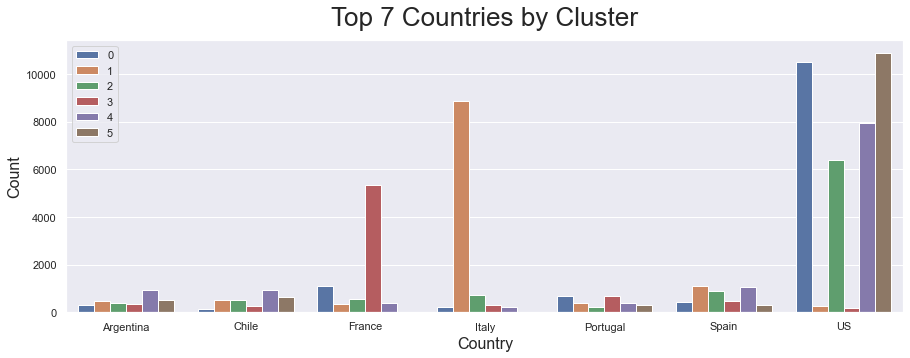

In [114]:
plot_clusters(df2, 'country',7,'Top 7 Countries by Cluster', 'Country', 
              ['Argentina','Chile','France','Italy','Portugal','Spain','US'],
              ['Argentina','Chile','France','Italy','Portugal','Spain','US'], 0, 2)

#### Region Plot

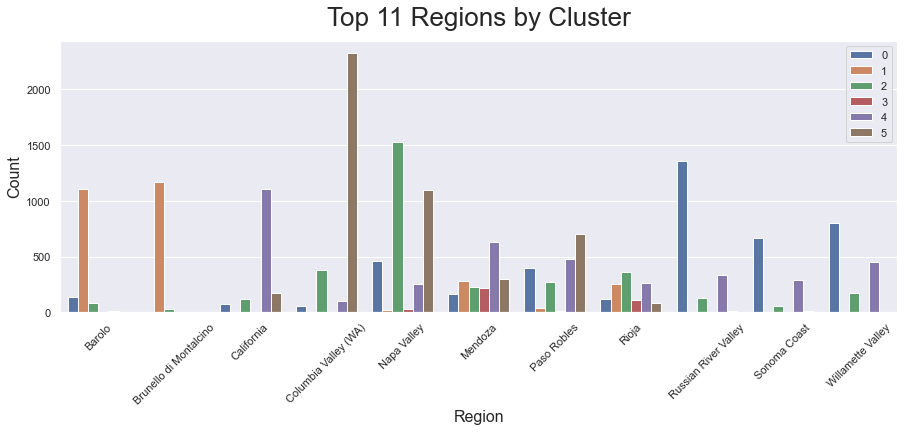

In [115]:
plot_clusters(df2,'region',11,'Top 11 Regions by Cluster', 'Region',
              ['Barolo','Brunello di Montalcino','California','Columbia Valley (WA)','Napa Valley','Mendoza','Paso Robles',
               'Rioja','Russian River Valley','Sonoma Coast','Willamette Valley'],
              ['Barolo','Brunello di Montalcino','California','Columbia Valley (WA)','Napa Valley','Mendoza','Paso Robles',
               'Rioja','Russian River Valley','Sonoma Coast','Willamette Valley'], 45, 1)

#### Variety Plot

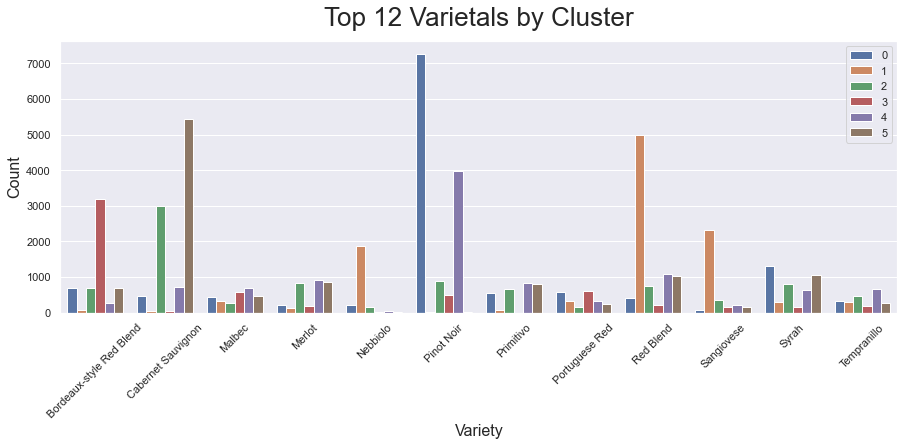

In [116]:
plot_clusters(df2,'variety',12,'Top 12 Varietals by Cluster', 'Variety',
              ['Bordeaux-style Red Blend','Cabernet Sauvignon','Malbec','Merlot','Nebbiolo','Pinot Noir','Primitivo',
               'Portuguese Red','Red Blend','Sangiovese','Syrah','Tempranillo'],
              ['Bordeaux-style Red Blend','Cabernet Sauvignon','Malbec','Merlot','Nebbiolo','Pinot Noir','Primitivo',
               'Portuguese Red','Red Blend','Sangiovese','Syrah','Tempranillo'],45, 0)


#### Vintage Plot

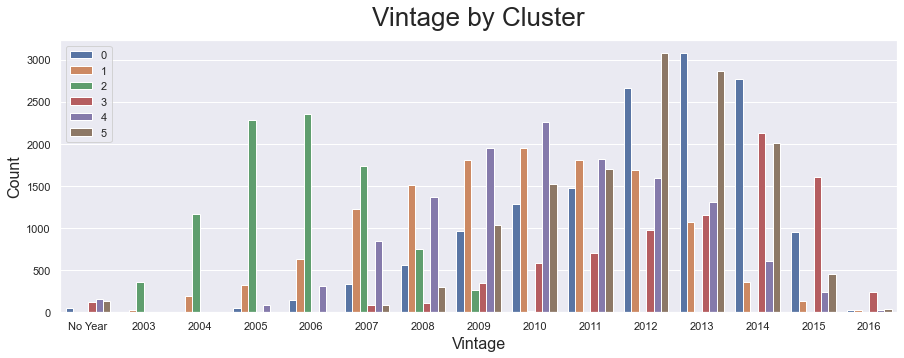

In [117]:
plot_clusters(df2, 'vintage',15,'Vintage by Cluster', 'Vintage', [0,14,13,12,11,10,9,8,7,6,5,4,3,2,1],
              ['No Year','2003','2004', '2005', '2006', '2007', '2008','2009','2010','2011','2012','2013','2014','2015','2016'],0,2)

#### Point Score Plot

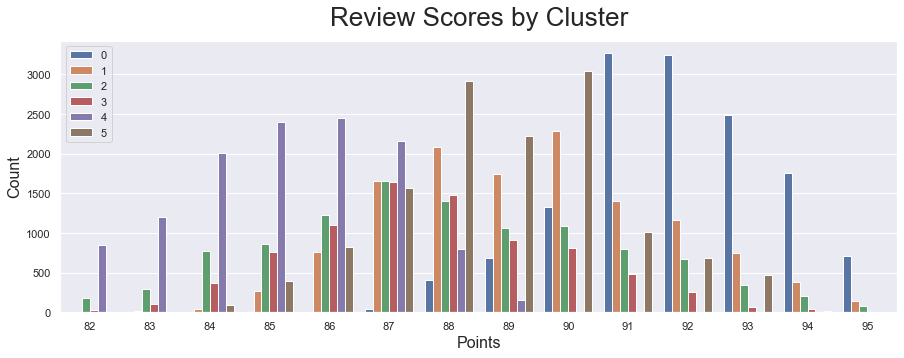

In [118]:
plot_clusters(df2, 'points',14,'Review Scores by Cluster', 'Points', [82,83,84,85,86,87,88,89,90,91,92,93,94,95],
              ['82','83','84','85', '86', '87', '88', '89','90','91','92','93','94','95'],0,2)

#### High-Quality Term vs. None Plot

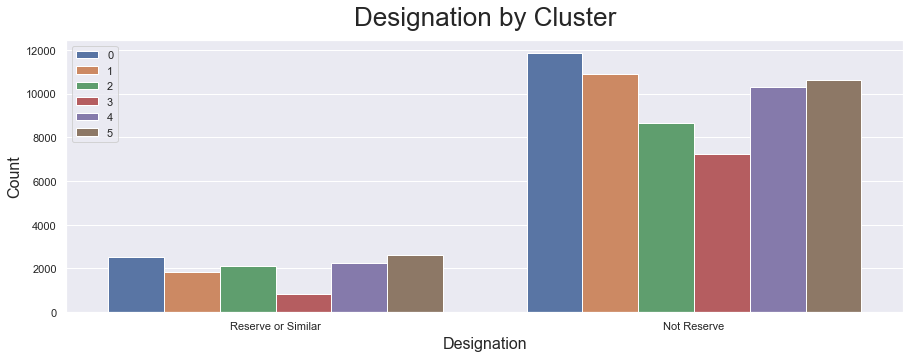

In [119]:
plot_clusters(df2, 'high_q_term',2,'Designation by Cluster', 'Designation', [1,0],
              ['Reserve or Similar','Not Reserve'],0,0)

#### Average Price Plot

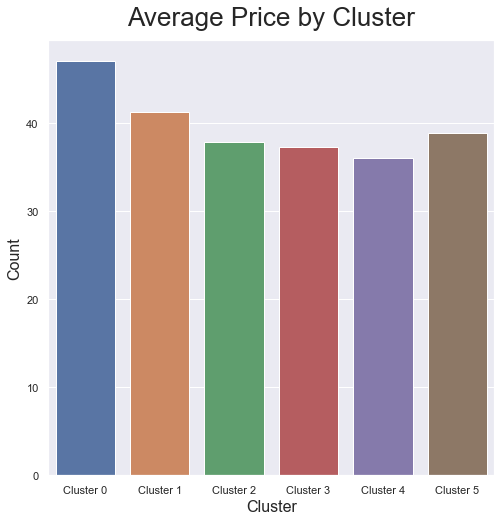

In [120]:
cluster_prices = df2.groupby('cluster_predicted')['price'].mean()
cluster_price_means = [cluster_prices[num] for num in range(0,6)]
x_numbers = [num ]

plt.figure(figsize=(8,8))
ax = plt.gca()

sns.barplot(x= [number for number in range(0,6)], y=cluster_price_means, palette = 'deep')

plt.xticks(np.arange(0, 1))
plt.xticks(np.arange(6), ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'], rotation=0)

ax.set_title('Average Price by Cluster',fontsize=26,pad=15)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Cluster', fontsize=16)

fig.tight_layout();


#### >>>Cluster Descriptions<<<
1. Cluster 0 - High-Rated American Pinot Noir
    - Highest on average price by far (\\$47.07)
    - Mostly American wines and regions (but not many from Napa)
    - Mostly Pinot Noir
    - Vintage similar to entire dataset
    - Highest rated cluster with peak at 91/92
1. Cluster 1 - Italian Wines
    - #2 on average price (\\$41.26)
    - Mostly Italian wines, regions and varietals
    - Somewhat older vintages peaking in 2010
    - Ratings similar to entire dataset, peaking at 88/90
1. Cluster 2 - Lower-Rated Napa Cabernets
    - #4 on average price (\\$37.94)
    - Mostly American wines
    - Mostly from Napa Valley
    - Mostly Cabernet Sauvignon
    - Oldest group of wines, peaking in 2005
    - Slightly lower ratings curve with peak at 87
    - Above average mix of reserve wines
1. Cluster 3 - French Wine
    - #5 on average price (\\$37.34)
    - Mostly French wines, regions and varietals
    - Youngest wines, with a peak in 2014
    - Slightly lower ratings curve with peak at 87
    - Below average mix of reserve wines
1. Cluster 4 - Value Pinot Noir
    - Lowest average price (\\$36.03)
    - Mostly American wine
    - Lots from California, the catch-all region that does not include the well-known CA regions
    - Mostly Pinot Noir
    - Somewhat older wines with peak of 2010
    - Lowest rating curve with peak at 85/86
1. Cluster 5
    - #3 on average price (\\$38.95)
    - Mostly American wines
    - Lots from both Napa Valley and Columbia Valley (WA)
    - Mostly Cabernet Sauvignon
    - Younger wines, peaking in 2012/2013
    - Above average review scores, peaking at 88/90
    - Above average mix of reserve wines

**>>>Cluster Interpretations<<<**

- We felt that these clusters made logical sense as they seem to be very distinct from each other. This strongly suggests that the cluster column will prove to be valuable in our modeling.
- With American wines being half of the dataset, it is not surprising that the two countries that are most dominant after that were each given their own clusters.
- Variety seems to be the first feature used for splitting the American wines, with Pinot Noir the main wine in clusters 1 & 4 and Cabernet Sauvignon the main wine in clusters 2 and 5.
- To make these last splits, the KPrototypes seems to have relied on review score.


[Table of Contents](#Table-Of-Contents)

## Next
- View [Modeling Notebook](3_modeling.ipynb).